I drew inspirations from the following notebooks in the making of this notebook:

- [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions) by [Manav Sehgal](https://www.kaggle.com/startupsci)
Titanic Top 4% With Emsemble Modelling by Yassin Ghouzam
I drew inspirations from the following notebooks in the making of this notebook:
- [Titanic Data Exploratory Analysis](https://github.com/chongjason914/kaggle-titanic/) by [Jason Chong](https://github.com/chongjason914/)
- [Titanic Top 4% With Emsemble Modelling](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling) by [Yassin Ghouzam](https://www.kaggle.com/yassineghouzam)
    

In [1]:
#Data Wrangling

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import missingno
from collections import Counter
#Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer  # Fixing typo: Simplelmputer to SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  # Fixing typo: RandomForestC1assif1er to RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Fixing typo: DecisionTreeC1assifier to DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  # Fixing typo: KNeighborsC1assifier to KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # Fixing typo: Gauss1anNB to GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

from catboost import CatBoostClassifier


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Data Input

In [2]:

# Assuming our dataset is a CSV file named 'train.csv'
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [6]:
ss.shape

(418, 2)

So, our final dataframe that is to be submitted should look something like this, 418 rows and 2 columns, one for PassengerId and one for Survived.

# 3. Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the [data](https://www.kaggle.com/c/titanic/data) tab of the competition page.

- Survived: 0 = Did not survive, 1 = Survived

- Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

- Sex: Male or female

- Age: Age in years, fractional if less than 1

- SibSp: Number of siblings or spouses aboard the titanic

- Parch: Number of parents or children aboard the titanic

- Ticket: Passenger ticket number

- Fare: Passenger fare

- Cabin: Cabin number

- Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

# 4. Exploratory Data Analysis (EDA)

Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [7]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
# Missing data in test set by columns 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<Axes: >

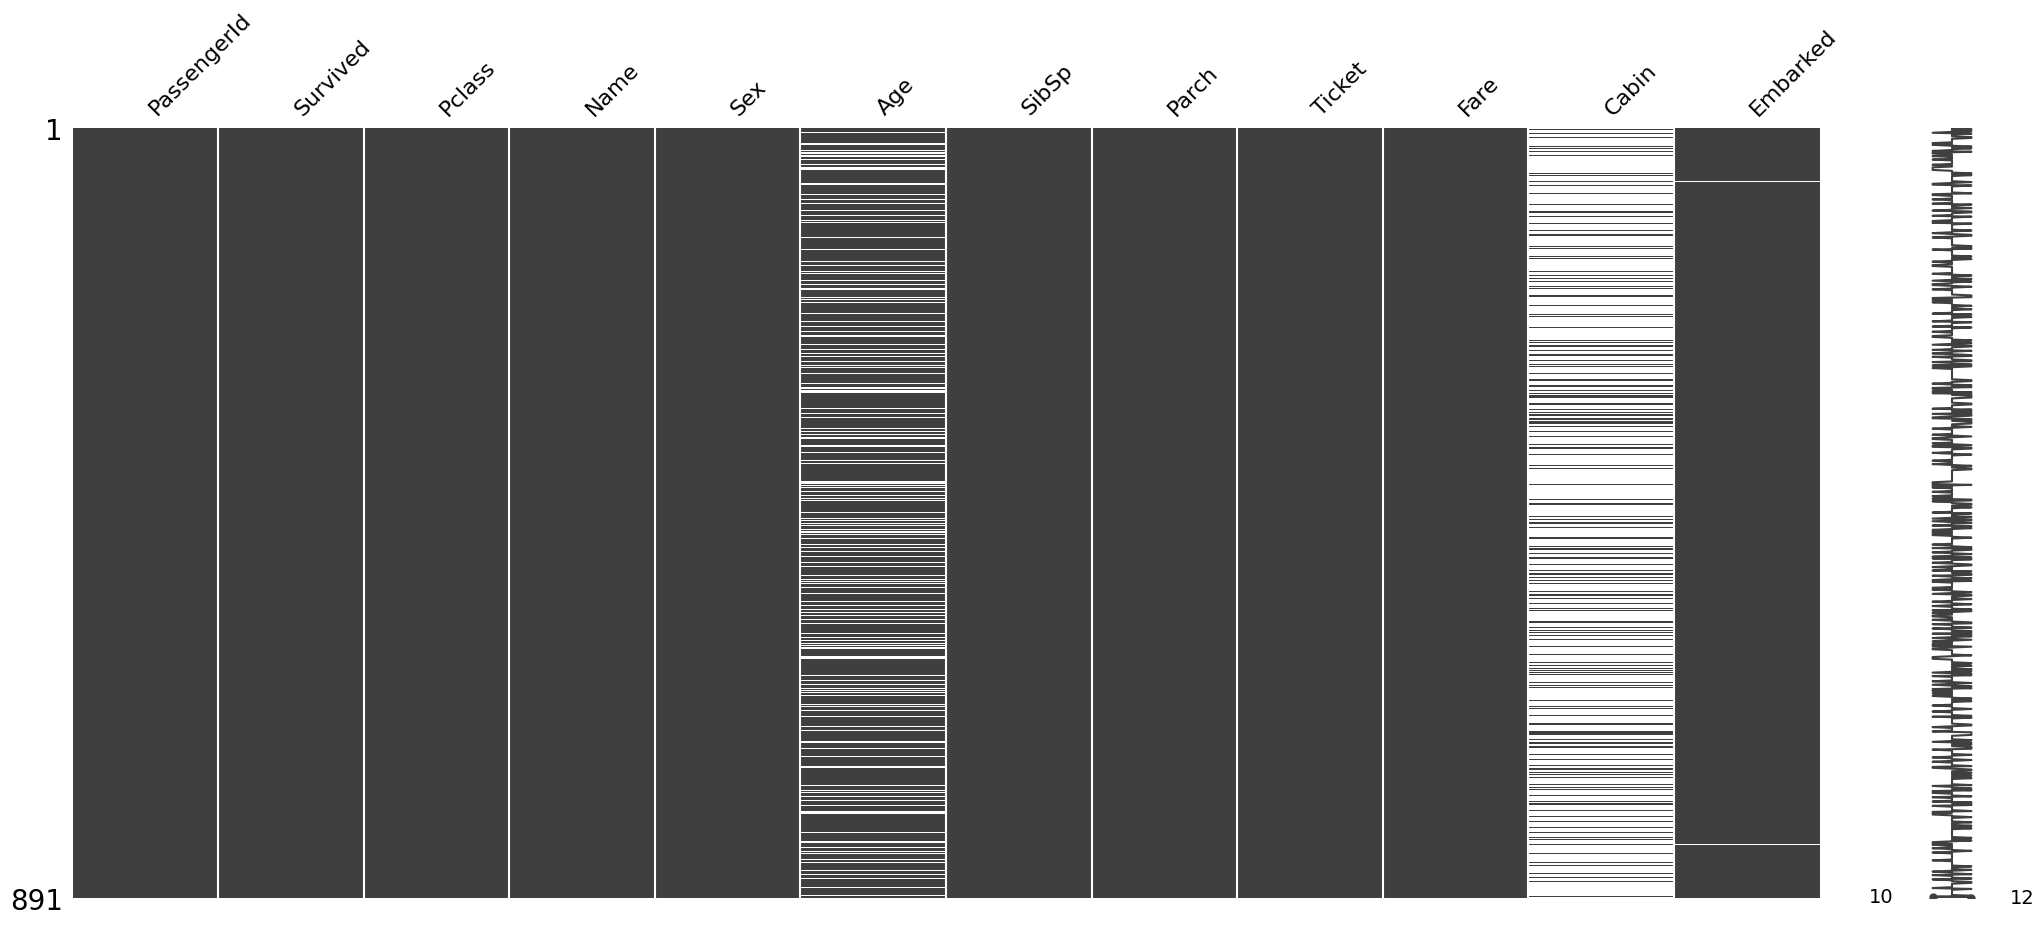

In [10]:
# Missing data in training set

missingno.matrix(train)

<Axes: >

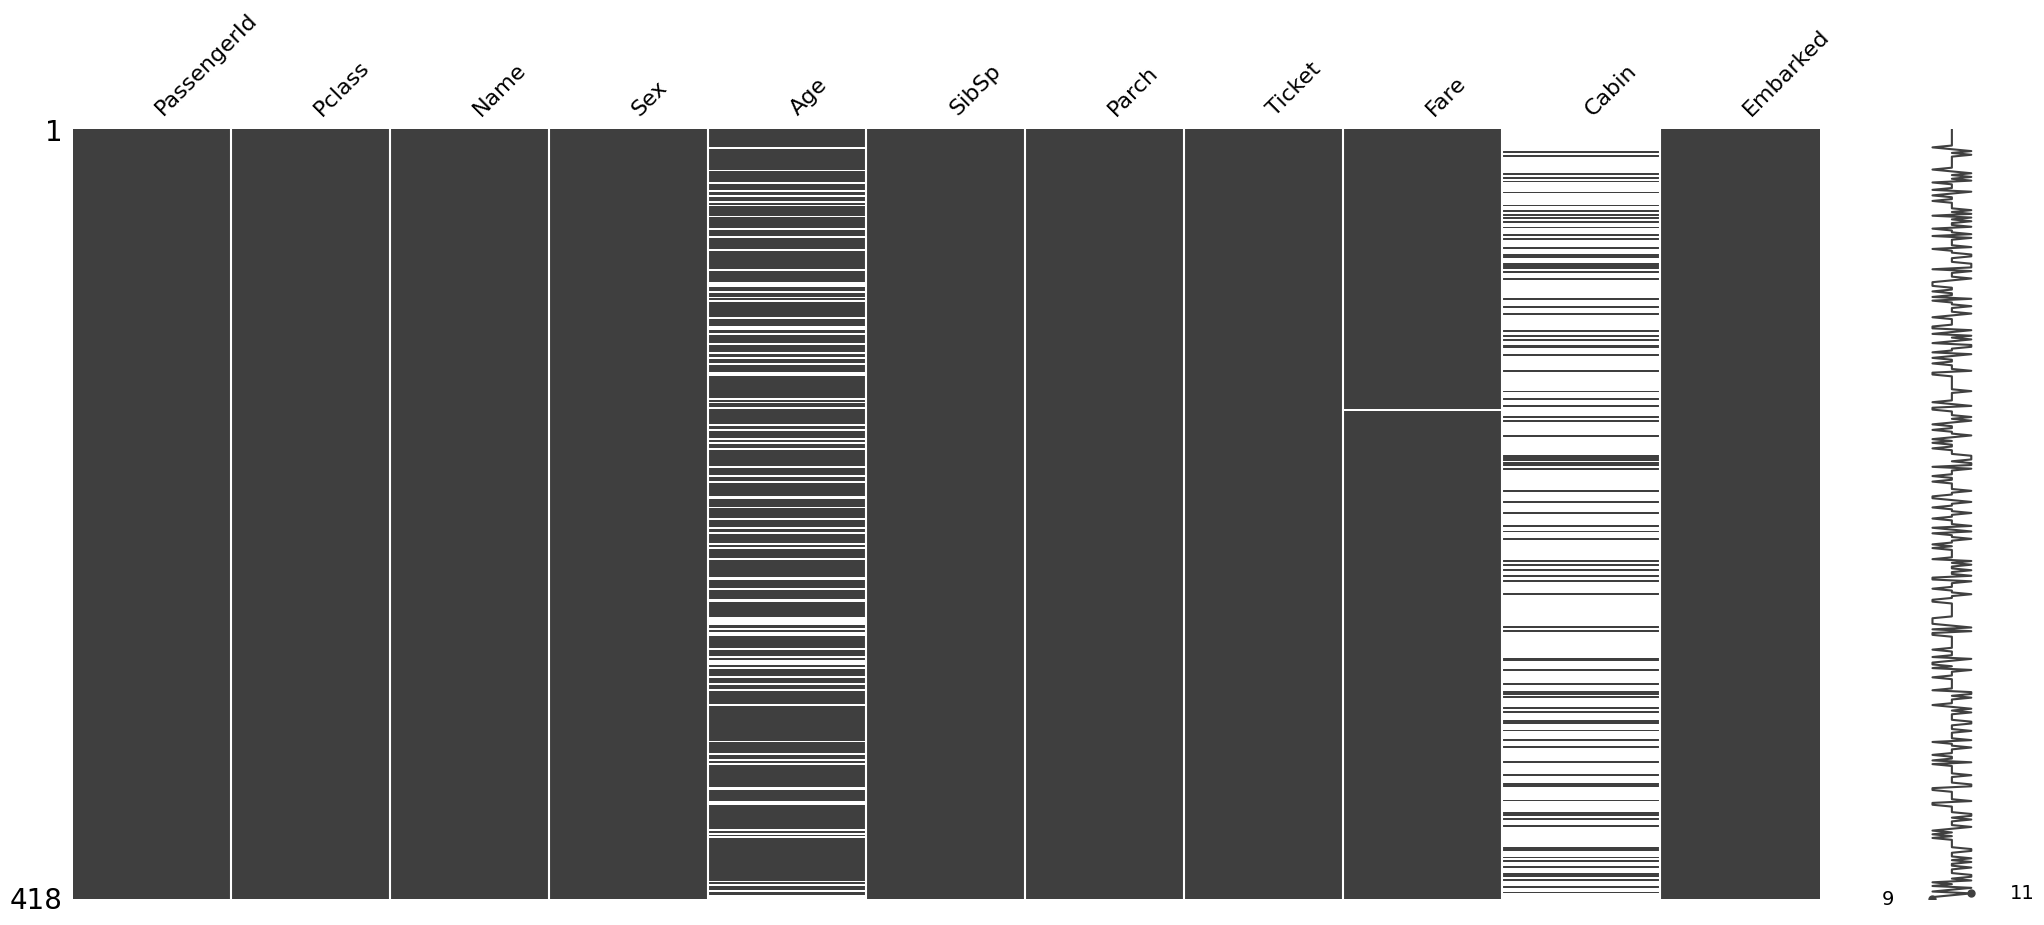

In [11]:
# Missing data in training set

missingno.matrix(test)

In [12]:
# Summary statistics for training set 

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Summary statistics for test set 

test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


##  Categorical variables

Categorical variables in our dataset are Sex, Pclass and Embarked.

In [14]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

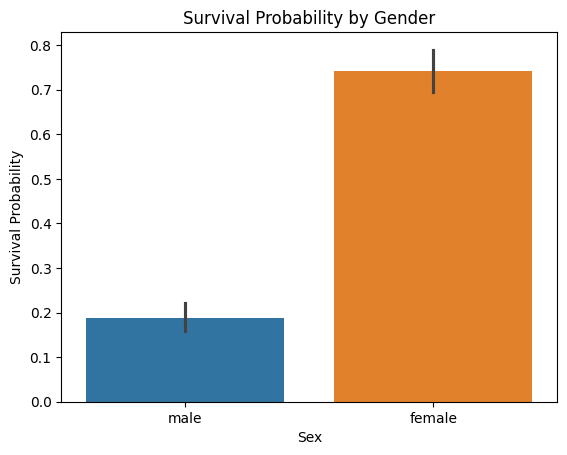

In [16]:
sns.barplot(x = 'Sex', y ='Survived', hue='Sex', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

In [17]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

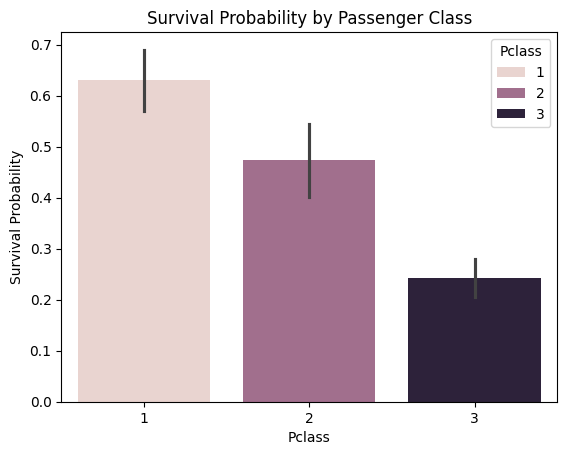

In [19]:
sns.barplot(x = 'Pclass', y ='Survived', hue='Pclass', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

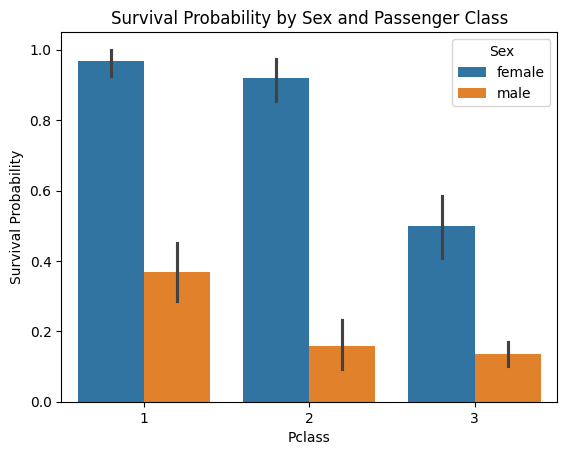

In [20]:
# Assuming 'train' is your DataFrame containing the data
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
g.set(ylabel='Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')
plt.show()

In [21]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [22]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

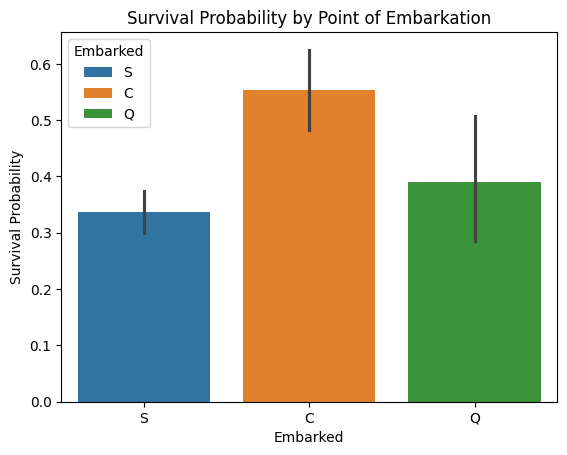

In [23]:
sns.barplot(x = 'Embarked', y ='Survived',hue='Embarked', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest in location **C** and lowest in location **S**.

Formulate a hypothesis whereby highest survival probability in location C is due to a majority of first-class passengers embarking there. Conversely, the lowest survival probability in location S could be linked to a higher proportion of third-class passengers

Let us now test this hypothesis

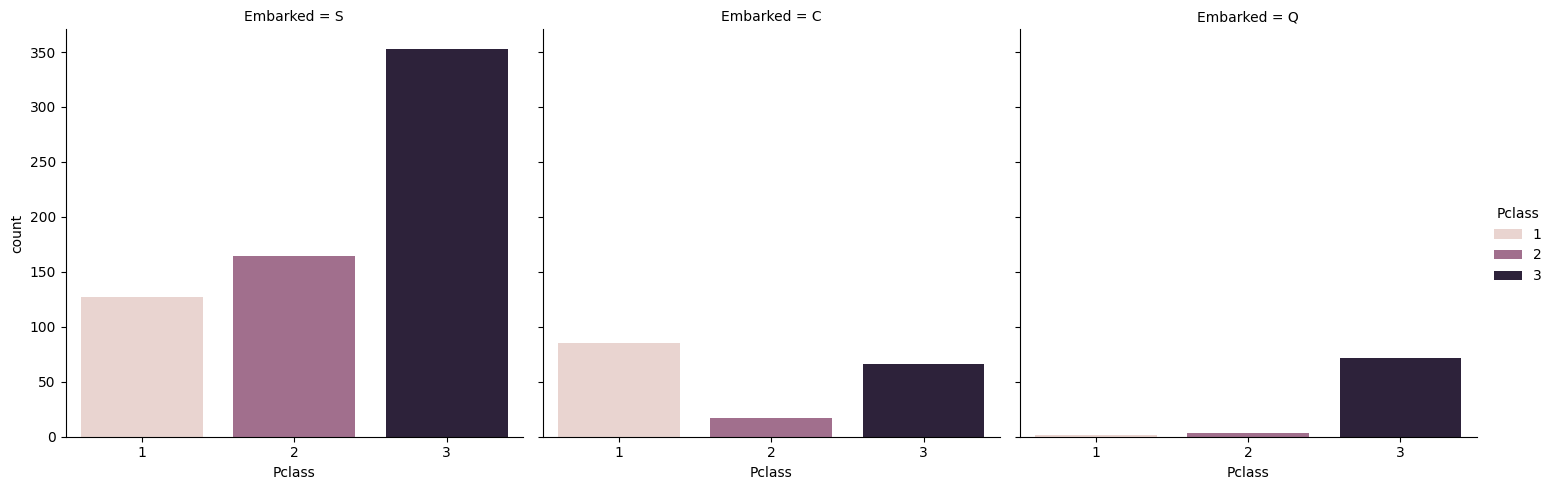

In [24]:
sns.catplot(x='Pclass', col='Embarked',hue='Pclass',data=train, kind='count')


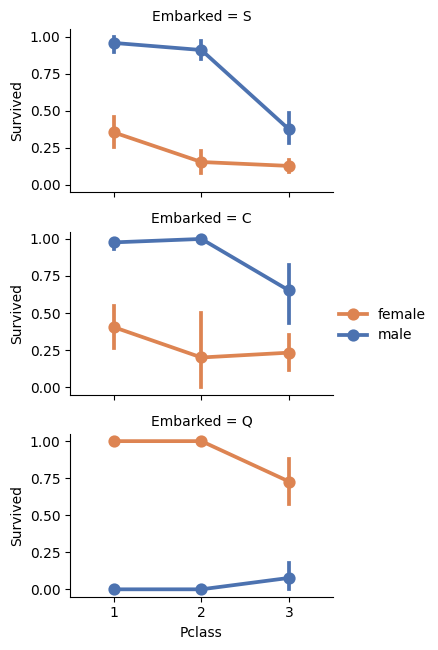

In [25]:
grid = sns.FacetGrid(train, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [26]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [27]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [28]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<Axes: >

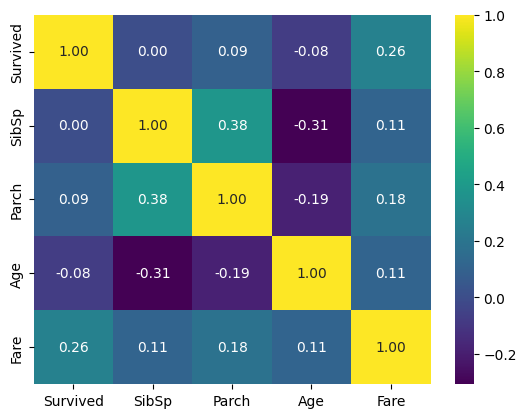

In [29]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'viridis')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

In [30]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [31]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

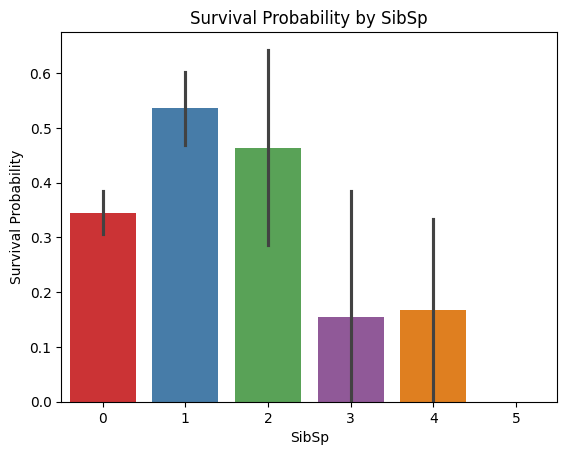

In [32]:
sns.barplot(x = 'SibSp', y ='Survived', data = train,palette='Set1')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [33]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [34]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

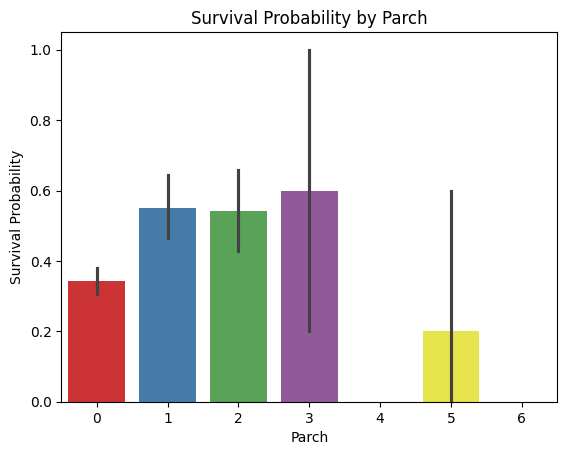

In [35]:
sns.barplot(x = 'Parch', y ='Survived', data = train,palette='Set1')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

In [36]:
# Null values in Age column 

train['Age'].isnull().sum()

170

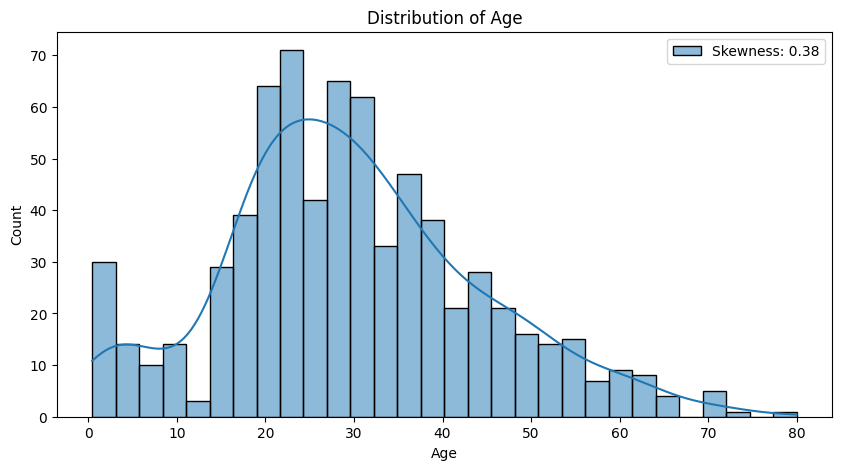

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='Age', bins=30, kde=True, label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.title('Distribution of Age')
plt.legend(loc = 'best')

skewness = train['Age'].skew()


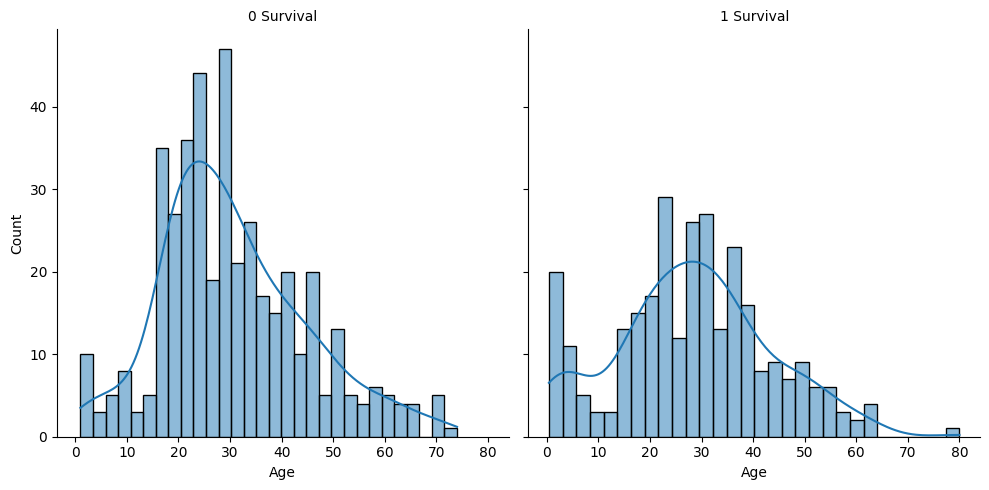

In [38]:
# Age distribution by survival
g = sns.FacetGrid(train, col='Survived', height=5)
g.map(sns.histplot, 'Age', bins=30, kde=True)
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template="{col_name} Survival")
plt.show()

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

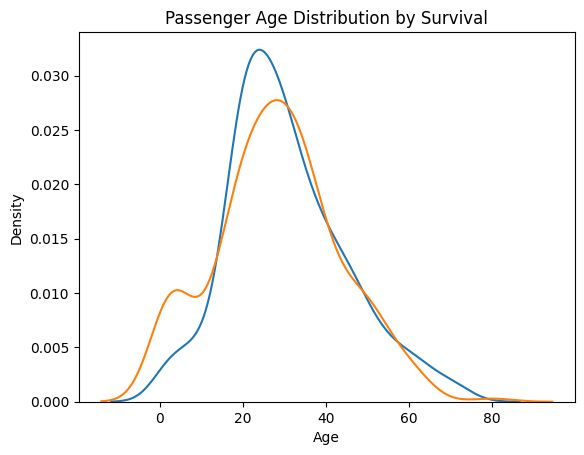

In [39]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

In [40]:
# Null values of Fare column 

train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passenger Fare Distribution')

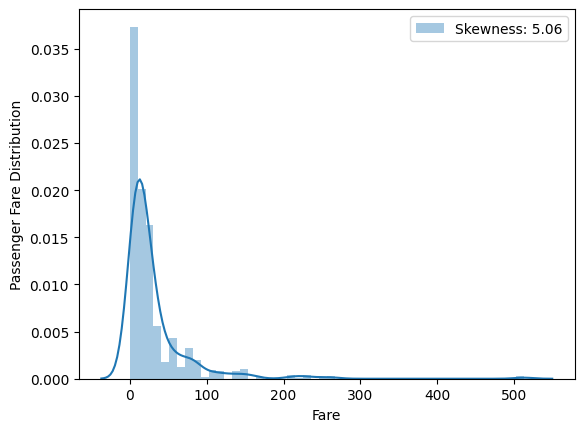

In [41]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

# Data preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

- Drop and fill missing values
- Data trasformation (log transformation)
- Feature engineering
- Feature encoding

In [42]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [43]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [44]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [45]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [46]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [47]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [48]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [49]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [50]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

Encoding

In [51]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

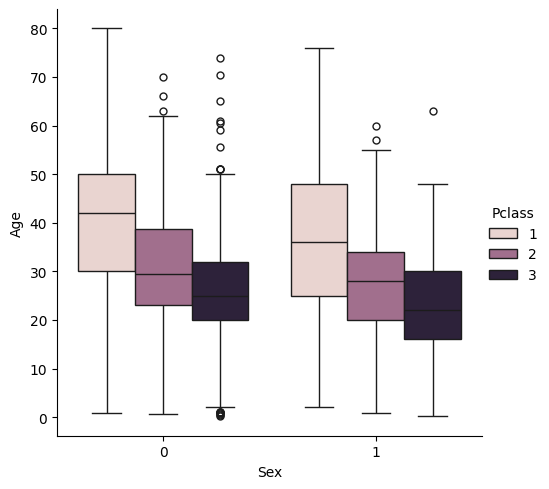

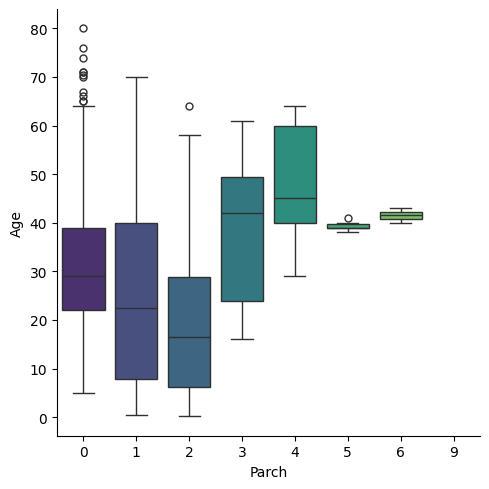

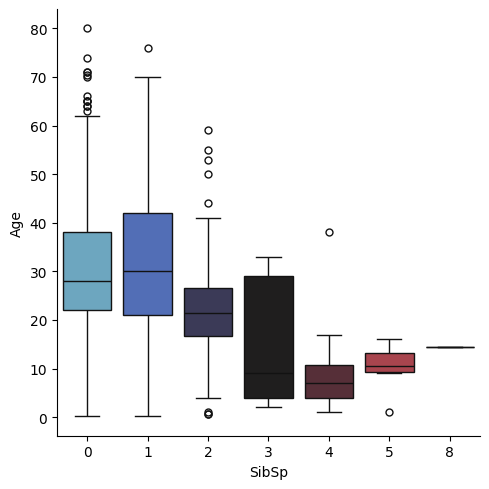

In [52]:
sns.catplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.catplot(y = 'Age', x = 'Parch', kind = 'box', data = combine, palette='viridis')
sns.catplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine, palette='icefire')

<Axes: xlabel='Pclass', ylabel='Age'>

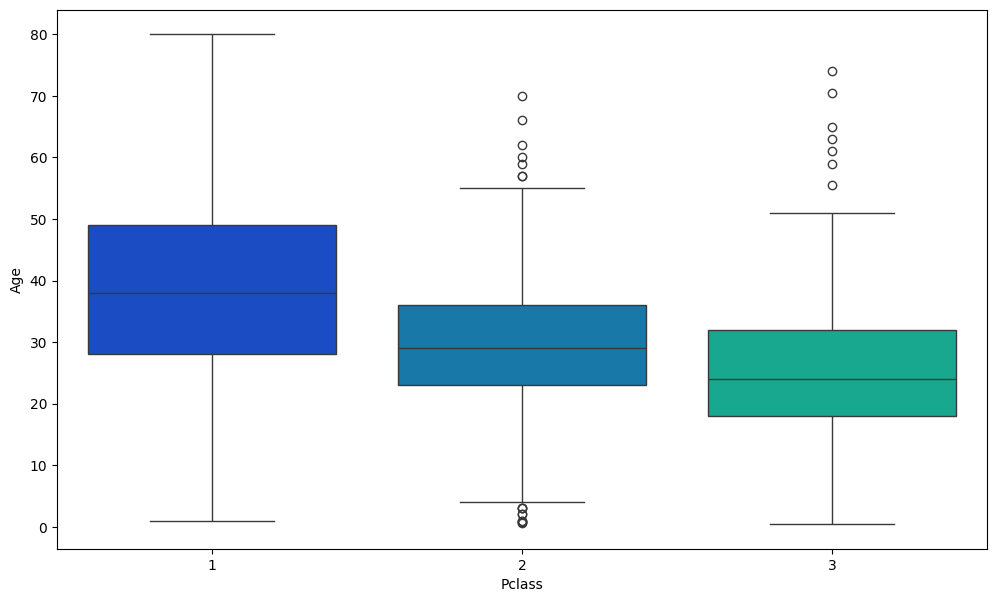

In [53]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [54]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [55]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


<Axes: >

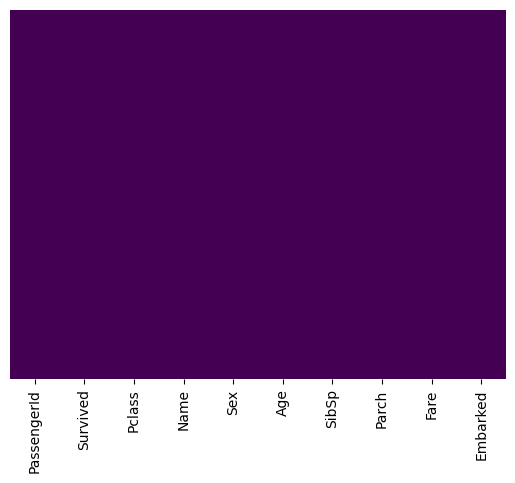

In [56]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [57]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          881 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Fare         881 non-null    float64
 9   Embarked     881 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.0+ KB


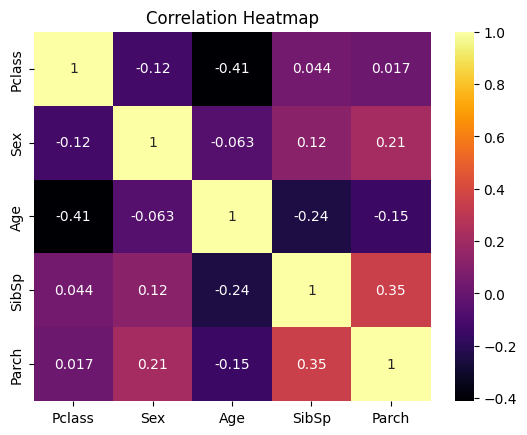

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combine' is your DataFrame containing the data

# Select only numeric columns for correlation analysis
numeric_columns = combine.select_dtypes(include=['float64', 'int64']).columns

# Drop additional non-numeric columns if needed
columns_to_drop = ['Survived', 'Name', 'PassengerId', 'Fare']
numeric_columns = [col for col in numeric_columns if col not in columns_to_drop]

# Create the correlation matrix
correlation_matrix = combine[numeric_columns].corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Heatmap')
plt.show()


In [59]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

In [60]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [61]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

##  Data transformation

Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

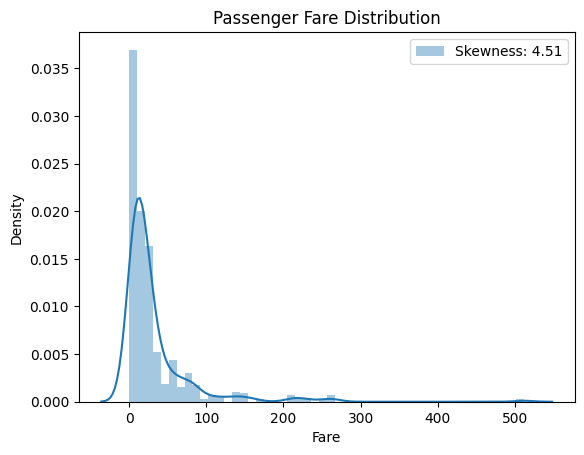

In [62]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [63]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

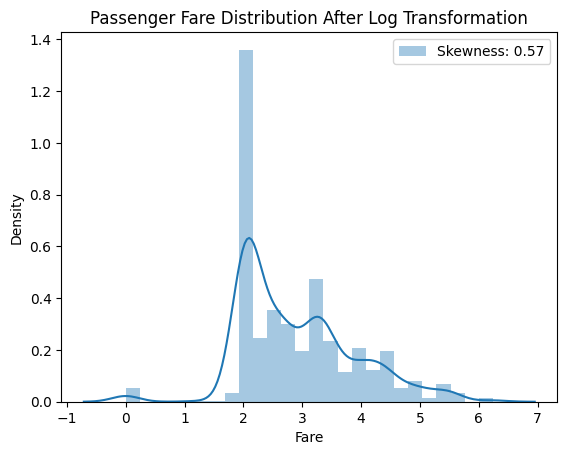

In [64]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

 ## Feature engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:
- Title
- IsAlone
- Age*Class

In [65]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [66]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [67]:
# Value counts of Title

combine['Title'].value_counts()

Title
Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [68]:
# Number of unique Title

combine['Title'].nunique()

18

In [69]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<Axes: xlabel='count', ylabel='Title'>

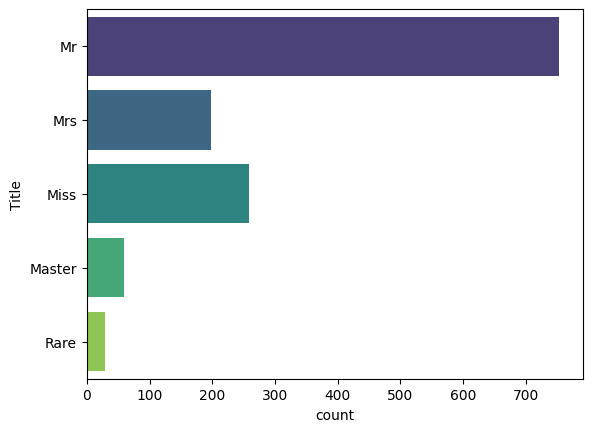

In [70]:
sns.countplot(combine['Title'],palette='viridis')

In [71]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

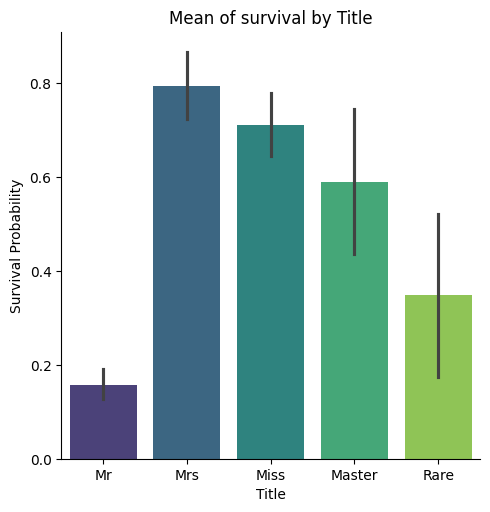

In [72]:
sns.catplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar', palette='viridis')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [73]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


## IsAlone

In [74]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [75]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [76]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [77]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [78]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


## Age*Class

In [79]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [80]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [81]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [82]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [83]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [84]:
# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## 5.4 Feature encoding 

Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [85]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [86]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,False,False,True,False,False,False,False,True
1,2,1.0,1,1,2,4.266662,0,2,False,False,False,True,False,True,False,False
2,3,1.0,3,1,1,2.070022,1,3,False,True,False,False,False,False,False,True
3,4,1.0,1,1,2,3.972177,0,2,False,False,False,True,False,False,False,True
4,5,0.0,3,0,2,2.085672,1,6,False,False,True,False,False,False,False,True


In [87]:


# Check if 'Embarked' column exists before applying get_dummies
if 'Embarked' in combine.columns:
    combine = pd.get_dummies(combine, columns=['Embarked'], prefix='Em', drop_first=True)

# Check and handle 'Em_C', 'Em_Q', and 'Em_S' columns
embarked_columns = ['Em_C', 'Em_Q', 'Em_S']
for col in embarked_columns:
    if col in combine.columns:
        combine[col] = combine[col].astype(int)

# Convert True/False values to 1/0 for existing boolean columns
combine['IsAlone'] = combine['IsAlone'].astype(int)
combine['Title_Master'] = combine['Title_Master'].astype(int)
combine['Title_Miss'] = combine['Title_Miss'].astype(int)
combine['Title_Mr'] = combine['Title_Mr'].astype(int)
combine['Title_Mrs'] = combine['Title_Mrs'].astype(int)
combine['Title_Rare'] = combine['Title_Rare'].astype(int)

combine.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [88]:
print(combine.describe())


       PassengerId    Survived       Pclass          Sex          Age  \
count  1299.000000  881.000000  1299.000000  1299.000000  1299.000000   
mean    657.093149    0.385925     2.294072     0.354888     1.316397   
std     377.743244    0.487090     0.837150     0.478664     0.817264   
min       1.000000    0.000000     1.000000     0.000000     0.000000   
25%     331.500000    0.000000     2.000000     0.000000     1.000000   
50%     657.000000    0.000000     3.000000     0.000000     1.000000   
75%     984.500000    1.000000     3.000000     1.000000     2.000000   
max    1309.000000    1.000000     3.000000     1.000000     4.000000   

              Fare      IsAlone    Age*Class  Title_Master   Title_Miss  \
count  1299.000000  1299.000000  1299.000000   1299.000000  1299.000000   
mean      2.897085     0.608160     2.710547      0.046189     0.199384   
std       0.994704     0.488349     1.689076      0.209976     0.399691   
min       0.000000     0.000000     0.0000

In [89]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [90]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [91]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [92]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [93]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [94]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [95]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [96]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [97]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [98]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [99]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


## 6.1 Split training data

We need to first split our training data into independent variables or predictor variables, represented by X as well as  dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [100]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


## Logistic Regression

In [101]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

## 6.2.2 Support vector machines

In [102]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

In [103]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.34

In [104]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

In [105]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

In [106]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [107]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.89

In [108]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [109]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

In [110]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 135ms	remaining: 2m 14s
1:	learn: 0.6798485	total: 136ms	remaining: 1m 7s
2:	learn: 0.6729520	total: 138ms	remaining: 45.8s
3:	learn: 0.6669729	total: 139ms	remaining: 34.7s
4:	learn: 0.6607853	total: 141ms	remaining: 28s
5:	learn: 0.6554568	total: 142ms	remaining: 23.5s
6:	learn: 0.6500727	total: 143ms	remaining: 20.3s
7:	learn: 0.6437982	total: 144ms	remaining: 17.9s
8:	learn: 0.6398272	total: 145ms	remaining: 16s
9:	learn: 0.6351628	total: 147ms	remaining: 14.5s
10:	learn: 0.6305969	total: 148ms	remaining: 13.3s
11:	learn: 0.6252274	total: 149ms	remaining: 12.3s
12:	learn: 0.6203165	total: 150ms	remaining: 11.4s
13:	learn: 0.6163249	total: 152ms	remaining: 10.7s
14:	learn: 0.6126752	total: 153ms	remaining: 10s
15:	learn: 0.6078515	total: 154ms	remaining: 9.45s
16:	learn: 0.6033553	total: 155ms	remaining: 8.96s
17:	learn: 0.5984437	total: 156ms	remaining: 8.51s
18:	learn: 0.5935188	total: 157ms	remaining: 8.12s
19:	learn: 0.5898

214:	learn: 0.3799604	total: 395ms	remaining: 1.44s
215:	learn: 0.3798391	total: 397ms	remaining: 1.44s
216:	learn: 0.3795674	total: 398ms	remaining: 1.44s
217:	learn: 0.3793745	total: 400ms	remaining: 1.43s
218:	learn: 0.3791233	total: 401ms	remaining: 1.43s
219:	learn: 0.3788587	total: 402ms	remaining: 1.43s
220:	learn: 0.3787629	total: 404ms	remaining: 1.42s
221:	learn: 0.3785718	total: 405ms	remaining: 1.42s
222:	learn: 0.3784962	total: 406ms	remaining: 1.41s
223:	learn: 0.3783817	total: 407ms	remaining: 1.41s
224:	learn: 0.3782131	total: 409ms	remaining: 1.41s
225:	learn: 0.3780237	total: 410ms	remaining: 1.4s
226:	learn: 0.3778051	total: 411ms	remaining: 1.4s
227:	learn: 0.3777072	total: 413ms	remaining: 1.4s
228:	learn: 0.3774516	total: 414ms	remaining: 1.39s
229:	learn: 0.3773283	total: 415ms	remaining: 1.39s
230:	learn: 0.3771741	total: 416ms	remaining: 1.39s
231:	learn: 0.3768482	total: 418ms	remaining: 1.38s
232:	learn: 0.3767748	total: 419ms	remaining: 1.38s
233:	learn: 0.3

529:	learn: 0.3514002	total: 777ms	remaining: 689ms
530:	learn: 0.3513412	total: 778ms	remaining: 687ms
531:	learn: 0.3513112	total: 779ms	remaining: 686ms
532:	learn: 0.3512478	total: 781ms	remaining: 684ms
533:	learn: 0.3511545	total: 782ms	remaining: 682ms
534:	learn: 0.3511219	total: 783ms	remaining: 681ms
535:	learn: 0.3510776	total: 784ms	remaining: 679ms
536:	learn: 0.3510304	total: 786ms	remaining: 677ms
537:	learn: 0.3509699	total: 787ms	remaining: 676ms
538:	learn: 0.3509443	total: 788ms	remaining: 674ms
539:	learn: 0.3508388	total: 789ms	remaining: 672ms
540:	learn: 0.3507535	total: 791ms	remaining: 671ms
541:	learn: 0.3506810	total: 792ms	remaining: 670ms
542:	learn: 0.3506620	total: 794ms	remaining: 668ms
543:	learn: 0.3506583	total: 795ms	remaining: 666ms
544:	learn: 0.3505760	total: 796ms	remaining: 665ms
545:	learn: 0.3505680	total: 797ms	remaining: 663ms
546:	learn: 0.3505305	total: 798ms	remaining: 661ms
547:	learn: 0.3505017	total: 800ms	remaining: 659ms
548:	learn: 

688:	learn: 0.3446554	total: 965ms	remaining: 435ms
689:	learn: 0.3445965	total: 966ms	remaining: 434ms
690:	learn: 0.3445448	total: 968ms	remaining: 433ms
691:	learn: 0.3444661	total: 969ms	remaining: 431ms
692:	learn: 0.3444189	total: 971ms	remaining: 430ms
693:	learn: 0.3443896	total: 972ms	remaining: 429ms
694:	learn: 0.3443259	total: 974ms	remaining: 427ms
695:	learn: 0.3442944	total: 975ms	remaining: 426ms
696:	learn: 0.3442509	total: 976ms	remaining: 424ms
697:	learn: 0.3442395	total: 977ms	remaining: 423ms
698:	learn: 0.3441685	total: 978ms	remaining: 421ms
699:	learn: 0.3441189	total: 980ms	remaining: 420ms
700:	learn: 0.3440922	total: 981ms	remaining: 419ms
701:	learn: 0.3440870	total: 983ms	remaining: 417ms
702:	learn: 0.3440379	total: 984ms	remaining: 416ms
703:	learn: 0.3439938	total: 985ms	remaining: 414ms
704:	learn: 0.3439472	total: 987ms	remaining: 413ms
705:	learn: 0.3439393	total: 988ms	remaining: 411ms
706:	learn: 0.3438692	total: 989ms	remaining: 410ms
707:	learn: 

## 6.3 Model evaluation and hyperparameter tuning

Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy. 

## 6.3.1 Training accuracy

Training accuracy shows how well our model has learned from the training set. 

In [111]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.34
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Naive Bayes,79.11
9,Stochastic Gradient Decent,78.89


## 6.3.2 K-fold cross validation

It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great [video](https://www.youtube.com/watch?v=fSytzGwwBVw) explaining the concept in more detail. 

In [112]:
# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [113]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 1.69ms	remaining: 1.69s
1:	learn: 0.6803102	total: 3.12ms	remaining: 1.55s
2:	learn: 0.6743326	total: 4.64ms	remaining: 1.54s
3:	learn: 0.6684760	total: 5.84ms	remaining: 1.46s
4:	learn: 0.6624557	total: 7.02ms	remaining: 1.4s
5:	learn: 0.6573314	total: 8.21ms	remaining: 1.36s
6:	learn: 0.6520748	total: 9.39ms	remaining: 1.33s
7:	learn: 0.6460856	total: 10.6ms	remaining: 1.31s
8:	learn: 0.6422711	total: 11.6ms	remaining: 1.28s
9:	learn: 0.6376840	total: 12.8ms	remaining: 1.27s
10:	learn: 0.6326541	total: 14ms	remaining: 1.26s
11:	learn: 0.6272334	total: 15.2ms	remaining: 1.25s
12:	learn: 0.6224744	total: 16.3ms	remaining: 1.23s
13:	learn: 0.6175199	total: 17.5ms	remaining: 1.23s
14:	learn: 0.6124417	total: 18.6ms	remaining: 1.22s
15:	learn: 0.6097890	total: 19.4ms	remaining: 1.19s
16:	learn: 0.6050558	total: 20.6ms	remaining: 1.19s
17:	learn: 0.6004952	total: 21.8ms	remaining: 1.19s
18:	learn: 0.5958639	total: 23ms	remaining: 1.1

165:	learn: 0.3910374	total: 196ms	remaining: 985ms
166:	learn: 0.3905291	total: 197ms	remaining: 984ms
167:	learn: 0.3903673	total: 198ms	remaining: 983ms
168:	learn: 0.3898661	total: 200ms	remaining: 982ms
169:	learn: 0.3894235	total: 201ms	remaining: 980ms
170:	learn: 0.3891329	total: 202ms	remaining: 980ms
171:	learn: 0.3888871	total: 203ms	remaining: 979ms
172:	learn: 0.3883141	total: 205ms	remaining: 978ms
173:	learn: 0.3877545	total: 206ms	remaining: 977ms
174:	learn: 0.3877043	total: 207ms	remaining: 975ms
175:	learn: 0.3872753	total: 208ms	remaining: 974ms
176:	learn: 0.3869728	total: 209ms	remaining: 973ms
177:	learn: 0.3865807	total: 211ms	remaining: 974ms
178:	learn: 0.3863848	total: 212ms	remaining: 973ms
179:	learn: 0.3861438	total: 214ms	remaining: 973ms
180:	learn: 0.3859608	total: 215ms	remaining: 972ms
181:	learn: 0.3857118	total: 216ms	remaining: 972ms
182:	learn: 0.3854771	total: 218ms	remaining: 972ms
183:	learn: 0.3851276	total: 219ms	remaining: 971ms
184:	learn: 

334:	learn: 0.3605765	total: 399ms	remaining: 792ms
335:	learn: 0.3604902	total: 400ms	remaining: 791ms
336:	learn: 0.3604220	total: 402ms	remaining: 790ms
337:	learn: 0.3602872	total: 403ms	remaining: 790ms
338:	learn: 0.3602078	total: 405ms	remaining: 789ms
339:	learn: 0.3601152	total: 406ms	remaining: 788ms
340:	learn: 0.3599696	total: 407ms	remaining: 787ms
341:	learn: 0.3598607	total: 409ms	remaining: 786ms
342:	learn: 0.3597595	total: 410ms	remaining: 785ms
343:	learn: 0.3597230	total: 411ms	remaining: 784ms
344:	learn: 0.3596014	total: 413ms	remaining: 784ms
345:	learn: 0.3594869	total: 414ms	remaining: 783ms
346:	learn: 0.3592878	total: 415ms	remaining: 782ms
347:	learn: 0.3591299	total: 417ms	remaining: 780ms
348:	learn: 0.3590166	total: 418ms	remaining: 779ms
349:	learn: 0.3589592	total: 419ms	remaining: 778ms
350:	learn: 0.3587920	total: 420ms	remaining: 777ms
351:	learn: 0.3587209	total: 421ms	remaining: 776ms
352:	learn: 0.3586699	total: 423ms	remaining: 774ms
353:	learn: 

495:	learn: 0.3474162	total: 590ms	remaining: 600ms
496:	learn: 0.3473590	total: 592ms	remaining: 599ms
497:	learn: 0.3472505	total: 593ms	remaining: 598ms
498:	learn: 0.3471865	total: 594ms	remaining: 597ms
499:	learn: 0.3470990	total: 596ms	remaining: 596ms
500:	learn: 0.3470226	total: 597ms	remaining: 595ms
501:	learn: 0.3469262	total: 598ms	remaining: 594ms
502:	learn: 0.3468786	total: 600ms	remaining: 592ms
503:	learn: 0.3468478	total: 601ms	remaining: 591ms
504:	learn: 0.3467873	total: 602ms	remaining: 590ms
505:	learn: 0.3466671	total: 604ms	remaining: 589ms
506:	learn: 0.3466339	total: 605ms	remaining: 588ms
507:	learn: 0.3465954	total: 606ms	remaining: 587ms
508:	learn: 0.3464621	total: 607ms	remaining: 586ms
509:	learn: 0.3464163	total: 608ms	remaining: 585ms
510:	learn: 0.3463478	total: 610ms	remaining: 583ms
511:	learn: 0.3462837	total: 611ms	remaining: 582ms
512:	learn: 0.3462663	total: 612ms	remaining: 581ms
513:	learn: 0.3461748	total: 613ms	remaining: 580ms
514:	learn: 

657:	learn: 0.3391309	total: 781ms	remaining: 406ms
658:	learn: 0.3391032	total: 783ms	remaining: 405ms
659:	learn: 0.3390578	total: 784ms	remaining: 404ms
660:	learn: 0.3390081	total: 786ms	remaining: 403ms
661:	learn: 0.3389647	total: 787ms	remaining: 402ms
662:	learn: 0.3388492	total: 788ms	remaining: 401ms
663:	learn: 0.3388475	total: 789ms	remaining: 399ms
664:	learn: 0.3387954	total: 790ms	remaining: 398ms
665:	learn: 0.3387475	total: 792ms	remaining: 397ms
666:	learn: 0.3387102	total: 793ms	remaining: 396ms
667:	learn: 0.3386672	total: 794ms	remaining: 395ms
668:	learn: 0.3385804	total: 795ms	remaining: 394ms
669:	learn: 0.3385642	total: 796ms	remaining: 392ms
670:	learn: 0.3385611	total: 797ms	remaining: 391ms
671:	learn: 0.3384659	total: 799ms	remaining: 390ms
672:	learn: 0.3384027	total: 800ms	remaining: 389ms
673:	learn: 0.3383147	total: 801ms	remaining: 387ms
674:	learn: 0.3382750	total: 802ms	remaining: 386ms
675:	learn: 0.3382102	total: 803ms	remaining: 385ms
676:	learn: 

821:	learn: 0.3314944	total: 973ms	remaining: 211ms
822:	learn: 0.3314543	total: 975ms	remaining: 210ms
823:	learn: 0.3313697	total: 976ms	remaining: 208ms
824:	learn: 0.3313235	total: 977ms	remaining: 207ms
825:	learn: 0.3312831	total: 979ms	remaining: 206ms
826:	learn: 0.3312469	total: 980ms	remaining: 205ms
827:	learn: 0.3312013	total: 981ms	remaining: 204ms
828:	learn: 0.3311380	total: 982ms	remaining: 203ms
829:	learn: 0.3311241	total: 984ms	remaining: 201ms
830:	learn: 0.3310938	total: 985ms	remaining: 200ms
831:	learn: 0.3310882	total: 986ms	remaining: 199ms
832:	learn: 0.3310197	total: 987ms	remaining: 198ms
833:	learn: 0.3309859	total: 989ms	remaining: 197ms
834:	learn: 0.3309523	total: 990ms	remaining: 196ms
835:	learn: 0.3309056	total: 991ms	remaining: 194ms
836:	learn: 0.3308495	total: 992ms	remaining: 193ms
837:	learn: 0.3307758	total: 994ms	remaining: 192ms
838:	learn: 0.3307287	total: 995ms	remaining: 191ms
839:	learn: 0.3306895	total: 996ms	remaining: 190ms
840:	learn: 

99:	learn: 0.4331316	total: 128ms	remaining: 1.15s
100:	learn: 0.4325785	total: 129ms	remaining: 1.15s
101:	learn: 0.4314486	total: 130ms	remaining: 1.15s
102:	learn: 0.4303471	total: 132ms	remaining: 1.15s
103:	learn: 0.4293043	total: 133ms	remaining: 1.15s
104:	learn: 0.4282594	total: 134ms	remaining: 1.14s
105:	learn: 0.4274736	total: 135ms	remaining: 1.14s
106:	learn: 0.4267922	total: 137ms	remaining: 1.14s
107:	learn: 0.4260115	total: 138ms	remaining: 1.14s
108:	learn: 0.4250120	total: 139ms	remaining: 1.14s
109:	learn: 0.4243876	total: 141ms	remaining: 1.14s
110:	learn: 0.4236397	total: 142ms	remaining: 1.14s
111:	learn: 0.4227316	total: 143ms	remaining: 1.14s
112:	learn: 0.4218699	total: 145ms	remaining: 1.13s
113:	learn: 0.4212382	total: 146ms	remaining: 1.13s
114:	learn: 0.4204573	total: 147ms	remaining: 1.13s
115:	learn: 0.4199664	total: 148ms	remaining: 1.13s
116:	learn: 0.4191776	total: 150ms	remaining: 1.13s
117:	learn: 0.4182638	total: 151ms	remaining: 1.13s
118:	learn: 0

260:	learn: 0.3754744	total: 318ms	remaining: 900ms
261:	learn: 0.3752939	total: 319ms	remaining: 899ms
262:	learn: 0.3750733	total: 320ms	remaining: 898ms
263:	learn: 0.3749029	total: 322ms	remaining: 897ms
264:	learn: 0.3746644	total: 323ms	remaining: 895ms
265:	learn: 0.3745058	total: 324ms	remaining: 894ms
266:	learn: 0.3742767	total: 325ms	remaining: 893ms
267:	learn: 0.3741969	total: 327ms	remaining: 892ms
268:	learn: 0.3740763	total: 328ms	remaining: 891ms
269:	learn: 0.3739424	total: 329ms	remaining: 891ms
270:	learn: 0.3738196	total: 331ms	remaining: 890ms
271:	learn: 0.3737197	total: 332ms	remaining: 889ms
272:	learn: 0.3735016	total: 333ms	remaining: 888ms
273:	learn: 0.3733170	total: 335ms	remaining: 887ms
274:	learn: 0.3732269	total: 336ms	remaining: 886ms
275:	learn: 0.3730713	total: 337ms	remaining: 884ms
276:	learn: 0.3729837	total: 338ms	remaining: 883ms
277:	learn: 0.3727359	total: 339ms	remaining: 882ms
278:	learn: 0.3725792	total: 341ms	remaining: 880ms
279:	learn: 

421:	learn: 0.3590107	total: 508ms	remaining: 696ms
422:	learn: 0.3589004	total: 510ms	remaining: 695ms
423:	learn: 0.3587872	total: 511ms	remaining: 694ms
424:	learn: 0.3587088	total: 512ms	remaining: 693ms
425:	learn: 0.3585807	total: 514ms	remaining: 692ms
426:	learn: 0.3585662	total: 515ms	remaining: 691ms
427:	learn: 0.3584539	total: 516ms	remaining: 690ms
428:	learn: 0.3583617	total: 517ms	remaining: 689ms
429:	learn: 0.3583366	total: 519ms	remaining: 687ms
430:	learn: 0.3582873	total: 520ms	remaining: 687ms
431:	learn: 0.3581703	total: 521ms	remaining: 685ms
432:	learn: 0.3580649	total: 523ms	remaining: 684ms
433:	learn: 0.3579957	total: 524ms	remaining: 683ms
434:	learn: 0.3578894	total: 525ms	remaining: 682ms
435:	learn: 0.3577667	total: 526ms	remaining: 680ms
436:	learn: 0.3577073	total: 527ms	remaining: 679ms
437:	learn: 0.3576160	total: 528ms	remaining: 678ms
438:	learn: 0.3575370	total: 530ms	remaining: 677ms
439:	learn: 0.3574546	total: 531ms	remaining: 676ms
440:	learn: 

581:	learn: 0.3489436	total: 699ms	remaining: 502ms
582:	learn: 0.3488698	total: 701ms	remaining: 501ms
583:	learn: 0.3488083	total: 702ms	remaining: 500ms
584:	learn: 0.3487533	total: 703ms	remaining: 499ms
585:	learn: 0.3487425	total: 704ms	remaining: 498ms
586:	learn: 0.3487083	total: 706ms	remaining: 497ms
587:	learn: 0.3487058	total: 707ms	remaining: 495ms
588:	learn: 0.3487047	total: 708ms	remaining: 494ms
589:	learn: 0.3486756	total: 709ms	remaining: 493ms
590:	learn: 0.3486055	total: 711ms	remaining: 492ms
591:	learn: 0.3485542	total: 712ms	remaining: 491ms
592:	learn: 0.3484952	total: 713ms	remaining: 490ms
593:	learn: 0.3484400	total: 715ms	remaining: 489ms
594:	learn: 0.3483976	total: 716ms	remaining: 488ms
595:	learn: 0.3483425	total: 718ms	remaining: 486ms
596:	learn: 0.3483006	total: 719ms	remaining: 485ms
597:	learn: 0.3482995	total: 720ms	remaining: 484ms
598:	learn: 0.3482421	total: 721ms	remaining: 483ms
599:	learn: 0.3481880	total: 722ms	remaining: 482ms
600:	learn: 

750:	learn: 0.3407964	total: 903ms	remaining: 299ms
751:	learn: 0.3407738	total: 904ms	remaining: 298ms
752:	learn: 0.3407004	total: 905ms	remaining: 297ms
753:	learn: 0.3406549	total: 907ms	remaining: 296ms
754:	learn: 0.3406480	total: 908ms	remaining: 295ms
755:	learn: 0.3405875	total: 909ms	remaining: 293ms
756:	learn: 0.3405393	total: 910ms	remaining: 292ms
757:	learn: 0.3405324	total: 911ms	remaining: 291ms
758:	learn: 0.3404860	total: 913ms	remaining: 290ms
759:	learn: 0.3404410	total: 914ms	remaining: 289ms
760:	learn: 0.3404033	total: 915ms	remaining: 287ms
761:	learn: 0.3403428	total: 917ms	remaining: 286ms
762:	learn: 0.3403074	total: 918ms	remaining: 285ms
763:	learn: 0.3402551	total: 919ms	remaining: 284ms
764:	learn: 0.3402142	total: 920ms	remaining: 283ms
765:	learn: 0.3401677	total: 922ms	remaining: 282ms
766:	learn: 0.3400874	total: 923ms	remaining: 280ms
767:	learn: 0.3400148	total: 924ms	remaining: 279ms
768:	learn: 0.3399444	total: 925ms	remaining: 278ms
769:	learn: 

909:	learn: 0.3341546	total: 1.09s	remaining: 108ms
910:	learn: 0.3341125	total: 1.1s	remaining: 107ms
911:	learn: 0.3340620	total: 1.1s	remaining: 106ms
912:	learn: 0.3340220	total: 1.1s	remaining: 105ms
913:	learn: 0.3339762	total: 1.1s	remaining: 104ms
914:	learn: 0.3339450	total: 1.1s	remaining: 102ms
915:	learn: 0.3338834	total: 1.1s	remaining: 101ms
916:	learn: 0.3338445	total: 1.1s	remaining: 99.9ms
917:	learn: 0.3338172	total: 1.1s	remaining: 98.7ms
918:	learn: 0.3337886	total: 1.11s	remaining: 97.5ms
919:	learn: 0.3337552	total: 1.11s	remaining: 96.3ms
920:	learn: 0.3337187	total: 1.11s	remaining: 95.1ms
921:	learn: 0.3337060	total: 1.11s	remaining: 93.9ms
922:	learn: 0.3336803	total: 1.11s	remaining: 92.7ms
923:	learn: 0.3336355	total: 1.11s	remaining: 91.5ms
924:	learn: 0.3335926	total: 1.11s	remaining: 90.3ms
925:	learn: 0.3335377	total: 1.11s	remaining: 89.1ms
926:	learn: 0.3335055	total: 1.12s	remaining: 87.9ms
927:	learn: 0.3334687	total: 1.12s	remaining: 86.7ms
928:	lea

212:	learn: 0.3618582	total: 251ms	remaining: 927ms
213:	learn: 0.3615859	total: 252ms	remaining: 926ms
214:	learn: 0.3613556	total: 253ms	remaining: 925ms
215:	learn: 0.3610069	total: 255ms	remaining: 924ms
216:	learn: 0.3607894	total: 256ms	remaining: 923ms
217:	learn: 0.3606000	total: 257ms	remaining: 923ms
218:	learn: 0.3604196	total: 259ms	remaining: 922ms
219:	learn: 0.3601362	total: 260ms	remaining: 921ms
220:	learn: 0.3599137	total: 261ms	remaining: 920ms
221:	learn: 0.3597482	total: 262ms	remaining: 919ms
222:	learn: 0.3596097	total: 263ms	remaining: 918ms
223:	learn: 0.3594985	total: 265ms	remaining: 917ms
224:	learn: 0.3594730	total: 266ms	remaining: 915ms
225:	learn: 0.3591242	total: 267ms	remaining: 915ms
226:	learn: 0.3590392	total: 269ms	remaining: 914ms
227:	learn: 0.3588479	total: 270ms	remaining: 914ms
228:	learn: 0.3586345	total: 271ms	remaining: 913ms
229:	learn: 0.3584680	total: 272ms	remaining: 912ms
230:	learn: 0.3582815	total: 274ms	remaining: 911ms
231:	learn: 

370:	learn: 0.3418241	total: 441ms	remaining: 748ms
371:	learn: 0.3417562	total: 443ms	remaining: 748ms
372:	learn: 0.3417135	total: 444ms	remaining: 747ms
373:	learn: 0.3416377	total: 446ms	remaining: 746ms
374:	learn: 0.3415483	total: 447ms	remaining: 745ms
375:	learn: 0.3414955	total: 449ms	remaining: 744ms
376:	learn: 0.3413527	total: 450ms	remaining: 743ms
377:	learn: 0.3412665	total: 451ms	remaining: 742ms
378:	learn: 0.3412552	total: 453ms	remaining: 742ms
379:	learn: 0.3411367	total: 454ms	remaining: 741ms
380:	learn: 0.3410008	total: 455ms	remaining: 740ms
381:	learn: 0.3409105	total: 457ms	remaining: 739ms
382:	learn: 0.3408560	total: 458ms	remaining: 738ms
383:	learn: 0.3408053	total: 459ms	remaining: 737ms
384:	learn: 0.3407669	total: 460ms	remaining: 736ms
385:	learn: 0.3406714	total: 462ms	remaining: 734ms
386:	learn: 0.3405219	total: 463ms	remaining: 733ms
387:	learn: 0.3403891	total: 464ms	remaining: 732ms
388:	learn: 0.3403150	total: 465ms	remaining: 731ms
389:	learn: 

531:	learn: 0.3303406	total: 636ms	remaining: 559ms
532:	learn: 0.3303308	total: 637ms	remaining: 558ms
533:	learn: 0.3303261	total: 638ms	remaining: 557ms
534:	learn: 0.3302584	total: 639ms	remaining: 556ms
535:	learn: 0.3302262	total: 641ms	remaining: 555ms
536:	learn: 0.3301545	total: 642ms	remaining: 553ms
537:	learn: 0.3300971	total: 643ms	remaining: 552ms
538:	learn: 0.3300538	total: 645ms	remaining: 551ms
539:	learn: 0.3299083	total: 646ms	remaining: 550ms
540:	learn: 0.3298631	total: 647ms	remaining: 549ms
541:	learn: 0.3297997	total: 649ms	remaining: 548ms
542:	learn: 0.3297467	total: 650ms	remaining: 547ms
543:	learn: 0.3296953	total: 651ms	remaining: 546ms
544:	learn: 0.3296651	total: 653ms	remaining: 545ms
545:	learn: 0.3296207	total: 654ms	remaining: 544ms
546:	learn: 0.3295011	total: 655ms	remaining: 542ms
547:	learn: 0.3293848	total: 656ms	remaining: 541ms
548:	learn: 0.3293199	total: 657ms	remaining: 540ms
549:	learn: 0.3293101	total: 658ms	remaining: 539ms
550:	learn: 

696:	learn: 0.3223690	total: 829ms	remaining: 360ms
697:	learn: 0.3222641	total: 830ms	remaining: 359ms
698:	learn: 0.3221897	total: 832ms	remaining: 358ms
699:	learn: 0.3221672	total: 833ms	remaining: 357ms
700:	learn: 0.3221267	total: 834ms	remaining: 356ms
701:	learn: 0.3220877	total: 836ms	remaining: 355ms
702:	learn: 0.3220631	total: 837ms	remaining: 353ms
703:	learn: 0.3220473	total: 838ms	remaining: 352ms
704:	learn: 0.3220105	total: 839ms	remaining: 351ms
705:	learn: 0.3219839	total: 852ms	remaining: 355ms
706:	learn: 0.3219123	total: 853ms	remaining: 354ms
707:	learn: 0.3219024	total: 855ms	remaining: 352ms
708:	learn: 0.3218931	total: 856ms	remaining: 351ms
709:	learn: 0.3218437	total: 857ms	remaining: 350ms
710:	learn: 0.3218060	total: 859ms	remaining: 349ms
711:	learn: 0.3218013	total: 860ms	remaining: 348ms
712:	learn: 0.3216954	total: 861ms	remaining: 347ms
713:	learn: 0.3216404	total: 862ms	remaining: 345ms
714:	learn: 0.3216093	total: 864ms	remaining: 344ms
715:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6870072	total: 1.28ms	remaining: 1.28s
1:	learn: 0.6816782	total: 2.32ms	remaining: 1.16s
2:	learn: 0.6782514	total: 3.39ms	remaining: 1.13s
3:	learn: 0.6718257	total: 4.57ms	remaining: 1.14s
4:	learn: 0.6663552	total: 5.64ms	remaining: 1.12s
5:	learn: 0.6616245	total: 6.66ms	remaining: 1.1s
6:	learn: 0.6559904	total: 7.85ms	remaining: 1.11s
7:	learn: 0.6504637	total: 9.02ms	remaining: 1.12s
8:	learn: 0.6453087	total: 10.2ms	remaining: 1.12s
9:	learn: 0.6398549	total: 11.4ms	remaining: 1.13s
10:	learn: 0.6353921	total: 12.6ms	remaining: 1.13s
11:	learn: 0.6300658	total: 13.7ms	remaining: 1.13s
12:	learn: 0.6246077	total: 14.9ms	remaining: 1.13s
13:	learn: 0.6220073	total: 15.7ms	remaining: 1.1s
14:	learn: 0.6171162	total: 16.9ms	remaining: 1.11s
15:	learn: 0.6130444	total: 18.2ms	remaining: 1.12s
16:	learn: 0.6091431	total: 19.5ms	remaining: 1.13s
17:	learn: 0.6045991	total: 20.8ms	remaining: 1.13s
18:	learn: 0.6003657	total: 21.9ms	remaining: 

163:	learn: 0.3964330	total: 195ms	remaining: 995ms
164:	learn: 0.3958656	total: 196ms	remaining: 994ms
165:	learn: 0.3956993	total: 198ms	remaining: 993ms
166:	learn: 0.3953907	total: 199ms	remaining: 992ms
167:	learn: 0.3948579	total: 200ms	remaining: 991ms
168:	learn: 0.3942929	total: 201ms	remaining: 990ms
169:	learn: 0.3939460	total: 203ms	remaining: 989ms
170:	learn: 0.3936777	total: 204ms	remaining: 988ms
171:	learn: 0.3933696	total: 205ms	remaining: 988ms
172:	learn: 0.3930845	total: 206ms	remaining: 987ms
173:	learn: 0.3929070	total: 208ms	remaining: 987ms
174:	learn: 0.3925681	total: 209ms	remaining: 987ms
175:	learn: 0.3923383	total: 211ms	remaining: 986ms
176:	learn: 0.3920377	total: 212ms	remaining: 985ms
177:	learn: 0.3918096	total: 213ms	remaining: 984ms
178:	learn: 0.3915366	total: 214ms	remaining: 983ms
179:	learn: 0.3913638	total: 215ms	remaining: 981ms
180:	learn: 0.3910589	total: 217ms	remaining: 980ms
181:	learn: 0.3907630	total: 218ms	remaining: 978ms
182:	learn: 

322:	learn: 0.3688237	total: 386ms	remaining: 809ms
323:	learn: 0.3687316	total: 387ms	remaining: 808ms
324:	learn: 0.3685716	total: 388ms	remaining: 807ms
325:	learn: 0.3685638	total: 389ms	remaining: 805ms
326:	learn: 0.3684900	total: 391ms	remaining: 804ms
327:	learn: 0.3684401	total: 392ms	remaining: 802ms
328:	learn: 0.3682300	total: 393ms	remaining: 801ms
329:	learn: 0.3682009	total: 394ms	remaining: 800ms
330:	learn: 0.3681386	total: 395ms	remaining: 799ms
331:	learn: 0.3680053	total: 397ms	remaining: 798ms
332:	learn: 0.3680021	total: 397ms	remaining: 796ms
333:	learn: 0.3679353	total: 399ms	remaining: 795ms
334:	learn: 0.3678618	total: 400ms	remaining: 794ms
335:	learn: 0.3677012	total: 401ms	remaining: 793ms
336:	learn: 0.3675906	total: 402ms	remaining: 792ms
337:	learn: 0.3674478	total: 404ms	remaining: 790ms
338:	learn: 0.3673550	total: 405ms	remaining: 789ms
339:	learn: 0.3672285	total: 406ms	remaining: 788ms
340:	learn: 0.3671117	total: 407ms	remaining: 787ms
341:	learn: 

485:	learn: 0.3564527	total: 576ms	remaining: 609ms
486:	learn: 0.3564192	total: 577ms	remaining: 608ms
487:	learn: 0.3563621	total: 578ms	remaining: 607ms
488:	learn: 0.3562670	total: 580ms	remaining: 606ms
489:	learn: 0.3562272	total: 581ms	remaining: 605ms
490:	learn: 0.3561513	total: 582ms	remaining: 604ms
491:	learn: 0.3560600	total: 583ms	remaining: 602ms
492:	learn: 0.3560427	total: 585ms	remaining: 601ms
493:	learn: 0.3559217	total: 586ms	remaining: 600ms
494:	learn: 0.3558924	total: 587ms	remaining: 599ms
495:	learn: 0.3558544	total: 588ms	remaining: 598ms
496:	learn: 0.3558449	total: 589ms	remaining: 597ms
497:	learn: 0.3557169	total: 591ms	remaining: 595ms
498:	learn: 0.3556422	total: 592ms	remaining: 594ms
499:	learn: 0.3556060	total: 593ms	remaining: 593ms
500:	learn: 0.3555328	total: 594ms	remaining: 592ms
501:	learn: 0.3554917	total: 595ms	remaining: 591ms
502:	learn: 0.3554445	total: 596ms	remaining: 589ms
503:	learn: 0.3554269	total: 597ms	remaining: 588ms
504:	learn: 

655:	learn: 0.3472537	total: 779ms	remaining: 409ms
656:	learn: 0.3472162	total: 781ms	remaining: 408ms
657:	learn: 0.3472009	total: 782ms	remaining: 406ms
658:	learn: 0.3471532	total: 783ms	remaining: 405ms
659:	learn: 0.3471113	total: 785ms	remaining: 404ms
660:	learn: 0.3470587	total: 786ms	remaining: 403ms
661:	learn: 0.3470170	total: 787ms	remaining: 402ms
662:	learn: 0.3469465	total: 788ms	remaining: 401ms
663:	learn: 0.3469449	total: 789ms	remaining: 399ms
664:	learn: 0.3469019	total: 791ms	remaining: 398ms
665:	learn: 0.3469021	total: 792ms	remaining: 397ms
666:	learn: 0.3468893	total: 793ms	remaining: 396ms
667:	learn: 0.3468415	total: 794ms	remaining: 395ms
668:	learn: 0.3468060	total: 795ms	remaining: 394ms
669:	learn: 0.3467653	total: 797ms	remaining: 392ms
670:	learn: 0.3467210	total: 798ms	remaining: 391ms
671:	learn: 0.3466796	total: 799ms	remaining: 390ms
672:	learn: 0.3466722	total: 800ms	remaining: 389ms
673:	learn: 0.3465545	total: 802ms	remaining: 388ms
674:	learn: 

814:	learn: 0.3402134	total: 969ms	remaining: 220ms
815:	learn: 0.3401941	total: 970ms	remaining: 219ms
816:	learn: 0.3401535	total: 971ms	remaining: 218ms
817:	learn: 0.3400932	total: 973ms	remaining: 216ms
818:	learn: 0.3400311	total: 974ms	remaining: 215ms
819:	learn: 0.3399928	total: 975ms	remaining: 214ms
820:	learn: 0.3399358	total: 976ms	remaining: 213ms
821:	learn: 0.3398807	total: 978ms	remaining: 212ms
822:	learn: 0.3398462	total: 979ms	remaining: 211ms
823:	learn: 0.3398257	total: 980ms	remaining: 209ms
824:	learn: 0.3397700	total: 981ms	remaining: 208ms
825:	learn: 0.3397496	total: 983ms	remaining: 207ms
826:	learn: 0.3397321	total: 984ms	remaining: 206ms
827:	learn: 0.3397216	total: 985ms	remaining: 205ms
828:	learn: 0.3396994	total: 986ms	remaining: 203ms
829:	learn: 0.3396633	total: 987ms	remaining: 202ms
830:	learn: 0.3396055	total: 988ms	remaining: 201ms
831:	learn: 0.3395398	total: 989ms	remaining: 200ms
832:	learn: 0.3394788	total: 991ms	remaining: 199ms
833:	learn: 

975:	learn: 0.3339624	total: 1.16s	remaining: 28.5ms
976:	learn: 0.3339149	total: 1.16s	remaining: 27.3ms
977:	learn: 0.3338655	total: 1.16s	remaining: 26.2ms
978:	learn: 0.3338329	total: 1.16s	remaining: 25ms
979:	learn: 0.3338109	total: 1.17s	remaining: 23.8ms
980:	learn: 0.3337838	total: 1.17s	remaining: 22.6ms
981:	learn: 0.3337193	total: 1.17s	remaining: 21.4ms
982:	learn: 0.3336934	total: 1.17s	remaining: 20.2ms
983:	learn: 0.3336621	total: 1.17s	remaining: 19ms
984:	learn: 0.3336226	total: 1.17s	remaining: 17.8ms
985:	learn: 0.3335709	total: 1.17s	remaining: 16.7ms
986:	learn: 0.3335403	total: 1.17s	remaining: 15.5ms
987:	learn: 0.3334885	total: 1.18s	remaining: 14.3ms
988:	learn: 0.3334527	total: 1.18s	remaining: 13.1ms
989:	learn: 0.3334333	total: 1.18s	remaining: 11.9ms
990:	learn: 0.3333965	total: 1.18s	remaining: 10.7ms
991:	learn: 0.3333609	total: 1.18s	remaining: 9.52ms
992:	learn: 0.3333336	total: 1.18s	remaining: 8.33ms
993:	learn: 0.3333029	total: 1.18s	remaining: 7.14

269:	learn: 0.3751919	total: 322ms	remaining: 869ms
270:	learn: 0.3751123	total: 323ms	remaining: 869ms
271:	learn: 0.3749229	total: 324ms	remaining: 868ms
272:	learn: 0.3748794	total: 325ms	remaining: 866ms
273:	learn: 0.3747245	total: 327ms	remaining: 865ms
274:	learn: 0.3745837	total: 328ms	remaining: 864ms
275:	learn: 0.3744455	total: 329ms	remaining: 863ms
276:	learn: 0.3742741	total: 330ms	remaining: 862ms
277:	learn: 0.3741305	total: 331ms	remaining: 861ms
278:	learn: 0.3739884	total: 333ms	remaining: 860ms
279:	learn: 0.3739729	total: 334ms	remaining: 859ms
280:	learn: 0.3737700	total: 335ms	remaining: 857ms
281:	learn: 0.3735366	total: 336ms	remaining: 856ms
282:	learn: 0.3735221	total: 337ms	remaining: 854ms
283:	learn: 0.3734463	total: 339ms	remaining: 853ms
284:	learn: 0.3733022	total: 340ms	remaining: 852ms
285:	learn: 0.3731288	total: 341ms	remaining: 851ms
286:	learn: 0.3730560	total: 342ms	remaining: 850ms
287:	learn: 0.3728894	total: 343ms	remaining: 849ms
288:	learn: 

435:	learn: 0.3595364	total: 513ms	remaining: 664ms
436:	learn: 0.3594312	total: 514ms	remaining: 662ms
437:	learn: 0.3594286	total: 515ms	remaining: 661ms
438:	learn: 0.3593707	total: 516ms	remaining: 660ms
439:	learn: 0.3593558	total: 517ms	remaining: 658ms
440:	learn: 0.3593509	total: 518ms	remaining: 657ms
441:	learn: 0.3593034	total: 519ms	remaining: 655ms
442:	learn: 0.3592074	total: 520ms	remaining: 654ms
443:	learn: 0.3590668	total: 521ms	remaining: 653ms
444:	learn: 0.3590076	total: 523ms	remaining: 652ms
445:	learn: 0.3589241	total: 524ms	remaining: 651ms
446:	learn: 0.3588473	total: 525ms	remaining: 649ms
447:	learn: 0.3587665	total: 526ms	remaining: 648ms
448:	learn: 0.3586637	total: 527ms	remaining: 647ms
449:	learn: 0.3585932	total: 529ms	remaining: 646ms
450:	learn: 0.3585451	total: 530ms	remaining: 645ms
451:	learn: 0.3585261	total: 531ms	remaining: 643ms
452:	learn: 0.3584919	total: 532ms	remaining: 642ms
453:	learn: 0.3584115	total: 533ms	remaining: 641ms
454:	learn: 

602:	learn: 0.3499915	total: 702ms	remaining: 462ms
603:	learn: 0.3499221	total: 704ms	remaining: 461ms
604:	learn: 0.3498694	total: 705ms	remaining: 460ms
605:	learn: 0.3498150	total: 706ms	remaining: 459ms
606:	learn: 0.3497502	total: 708ms	remaining: 458ms
607:	learn: 0.3496632	total: 709ms	remaining: 457ms
608:	learn: 0.3496286	total: 710ms	remaining: 456ms
609:	learn: 0.3495655	total: 712ms	remaining: 455ms
610:	learn: 0.3495136	total: 713ms	remaining: 454ms
611:	learn: 0.3494769	total: 714ms	remaining: 453ms
612:	learn: 0.3493762	total: 716ms	remaining: 452ms
613:	learn: 0.3493545	total: 717ms	remaining: 451ms
614:	learn: 0.3493391	total: 718ms	remaining: 450ms
615:	learn: 0.3492837	total: 719ms	remaining: 448ms
616:	learn: 0.3492181	total: 721ms	remaining: 447ms
617:	learn: 0.3492003	total: 722ms	remaining: 446ms
618:	learn: 0.3491231	total: 723ms	remaining: 445ms
619:	learn: 0.3490778	total: 724ms	remaining: 444ms
620:	learn: 0.3490250	total: 725ms	remaining: 443ms
621:	learn: 

766:	learn: 0.3426147	total: 895ms	remaining: 272ms
767:	learn: 0.3425619	total: 896ms	remaining: 271ms
768:	learn: 0.3425097	total: 897ms	remaining: 270ms
769:	learn: 0.3424557	total: 899ms	remaining: 268ms
770:	learn: 0.3424349	total: 900ms	remaining: 267ms
771:	learn: 0.3423465	total: 901ms	remaining: 266ms
772:	learn: 0.3423037	total: 902ms	remaining: 265ms
773:	learn: 0.3422955	total: 904ms	remaining: 264ms
774:	learn: 0.3422421	total: 905ms	remaining: 263ms
775:	learn: 0.3421630	total: 906ms	remaining: 262ms
776:	learn: 0.3421444	total: 908ms	remaining: 261ms
777:	learn: 0.3420696	total: 909ms	remaining: 259ms
778:	learn: 0.3420157	total: 910ms	remaining: 258ms
779:	learn: 0.3420089	total: 911ms	remaining: 257ms
780:	learn: 0.3420017	total: 912ms	remaining: 256ms
781:	learn: 0.3419347	total: 913ms	remaining: 255ms
782:	learn: 0.3418420	total: 915ms	remaining: 254ms
783:	learn: 0.3418102	total: 916ms	remaining: 252ms
784:	learn: 0.3417875	total: 917ms	remaining: 251ms
785:	learn: 

924:	learn: 0.3363797	total: 1.08s	remaining: 87.9ms
925:	learn: 0.3363346	total: 1.08s	remaining: 86.7ms
926:	learn: 0.3363284	total: 1.09s	remaining: 85.6ms
927:	learn: 0.3362834	total: 1.09s	remaining: 84.4ms
928:	learn: 0.3362444	total: 1.09s	remaining: 83.3ms
929:	learn: 0.3361909	total: 1.09s	remaining: 82.1ms
930:	learn: 0.3361675	total: 1.09s	remaining: 80.9ms
931:	learn: 0.3361526	total: 1.09s	remaining: 79.8ms
932:	learn: 0.3361071	total: 1.09s	remaining: 78.6ms
933:	learn: 0.3360774	total: 1.09s	remaining: 77.4ms
934:	learn: 0.3360280	total: 1.1s	remaining: 76.3ms
935:	learn: 0.3360065	total: 1.1s	remaining: 75.1ms
936:	learn: 0.3359795	total: 1.1s	remaining: 73.9ms
937:	learn: 0.3359469	total: 1.1s	remaining: 72.8ms
938:	learn: 0.3358989	total: 1.1s	remaining: 71.6ms
939:	learn: 0.3358546	total: 1.1s	remaining: 70.4ms
940:	learn: 0.3358297	total: 1.1s	remaining: 69.2ms
941:	learn: 0.3357783	total: 1.1s	remaining: 68.1ms
942:	learn: 0.3357337	total: 1.11s	remaining: 66.9ms
9

219:	learn: 0.3807245	total: 260ms	remaining: 921ms
220:	learn: 0.3805200	total: 261ms	remaining: 920ms
221:	learn: 0.3803816	total: 262ms	remaining: 918ms
222:	learn: 0.3803411	total: 263ms	remaining: 917ms
223:	learn: 0.3799987	total: 264ms	remaining: 916ms
224:	learn: 0.3797456	total: 266ms	remaining: 915ms
225:	learn: 0.3795067	total: 267ms	remaining: 914ms
226:	learn: 0.3793033	total: 268ms	remaining: 913ms
227:	learn: 0.3790673	total: 269ms	remaining: 912ms
228:	learn: 0.3790462	total: 270ms	remaining: 910ms
229:	learn: 0.3789225	total: 271ms	remaining: 909ms
230:	learn: 0.3786778	total: 273ms	remaining: 908ms
231:	learn: 0.3784601	total: 274ms	remaining: 907ms
232:	learn: 0.3783194	total: 276ms	remaining: 907ms
233:	learn: 0.3781410	total: 277ms	remaining: 906ms
234:	learn: 0.3778039	total: 278ms	remaining: 905ms
235:	learn: 0.3775653	total: 279ms	remaining: 904ms
236:	learn: 0.3774114	total: 281ms	remaining: 903ms
237:	learn: 0.3772174	total: 282ms	remaining: 902ms
238:	learn: 

378:	learn: 0.3614827	total: 451ms	remaining: 740ms
379:	learn: 0.3613644	total: 453ms	remaining: 739ms
380:	learn: 0.3612793	total: 454ms	remaining: 738ms
381:	learn: 0.3612721	total: 455ms	remaining: 736ms
382:	learn: 0.3611505	total: 456ms	remaining: 735ms
383:	learn: 0.3611330	total: 457ms	remaining: 733ms
384:	learn: 0.3610234	total: 458ms	remaining: 732ms
385:	learn: 0.3609107	total: 460ms	remaining: 731ms
386:	learn: 0.3608443	total: 461ms	remaining: 730ms
387:	learn: 0.3607672	total: 462ms	remaining: 729ms
388:	learn: 0.3607287	total: 464ms	remaining: 728ms
389:	learn: 0.3606194	total: 465ms	remaining: 727ms
390:	learn: 0.3604669	total: 466ms	remaining: 726ms
391:	learn: 0.3604058	total: 467ms	remaining: 725ms
392:	learn: 0.3603262	total: 469ms	remaining: 724ms
393:	learn: 0.3601530	total: 470ms	remaining: 723ms
394:	learn: 0.3600044	total: 471ms	remaining: 722ms
395:	learn: 0.3599469	total: 472ms	remaining: 720ms
396:	learn: 0.3599014	total: 473ms	remaining: 719ms
397:	learn: 

541:	learn: 0.3513503	total: 641ms	remaining: 542ms
542:	learn: 0.3513002	total: 642ms	remaining: 541ms
543:	learn: 0.3512505	total: 644ms	remaining: 540ms
544:	learn: 0.3512395	total: 645ms	remaining: 538ms
545:	learn: 0.3511820	total: 646ms	remaining: 537ms
546:	learn: 0.3511770	total: 647ms	remaining: 536ms
547:	learn: 0.3511557	total: 649ms	remaining: 535ms
548:	learn: 0.3510902	total: 650ms	remaining: 534ms
549:	learn: 0.3510134	total: 651ms	remaining: 533ms
550:	learn: 0.3509353	total: 652ms	remaining: 532ms
551:	learn: 0.3509071	total: 661ms	remaining: 536ms
552:	learn: 0.3508328	total: 662ms	remaining: 535ms
553:	learn: 0.3507727	total: 664ms	remaining: 534ms
554:	learn: 0.3507726	total: 665ms	remaining: 533ms
555:	learn: 0.3507209	total: 667ms	remaining: 532ms
556:	learn: 0.3506674	total: 668ms	remaining: 531ms
557:	learn: 0.3506171	total: 669ms	remaining: 530ms
558:	learn: 0.3505584	total: 671ms	remaining: 529ms
559:	learn: 0.3504734	total: 672ms	remaining: 528ms
560:	learn: 

849:	learn: 0.3387631	total: 1.02s	remaining: 180ms
850:	learn: 0.3387126	total: 1.02s	remaining: 179ms
851:	learn: 0.3386854	total: 1.02s	remaining: 178ms
852:	learn: 0.3386462	total: 1.03s	remaining: 177ms
853:	learn: 0.3385909	total: 1.03s	remaining: 176ms
854:	learn: 0.3385392	total: 1.03s	remaining: 174ms
855:	learn: 0.3384787	total: 1.03s	remaining: 173ms
856:	learn: 0.3384343	total: 1.03s	remaining: 172ms
857:	learn: 0.3383814	total: 1.03s	remaining: 171ms
858:	learn: 0.3383554	total: 1.03s	remaining: 170ms
859:	learn: 0.3383028	total: 1.03s	remaining: 168ms
860:	learn: 0.3382671	total: 1.03s	remaining: 167ms
861:	learn: 0.3382112	total: 1.04s	remaining: 166ms
862:	learn: 0.3381903	total: 1.04s	remaining: 165ms
863:	learn: 0.3381560	total: 1.04s	remaining: 164ms
864:	learn: 0.3381349	total: 1.04s	remaining: 162ms
865:	learn: 0.3381028	total: 1.04s	remaining: 161ms
866:	learn: 0.3380382	total: 1.04s	remaining: 160ms
867:	learn: 0.3380203	total: 1.04s	remaining: 159ms
868:	learn: 

170:	learn: 0.3896391	total: 197ms	remaining: 955ms
171:	learn: 0.3892421	total: 198ms	remaining: 954ms
172:	learn: 0.3889541	total: 199ms	remaining: 953ms
173:	learn: 0.3884450	total: 201ms	remaining: 952ms
174:	learn: 0.3880906	total: 202ms	remaining: 952ms
175:	learn: 0.3878406	total: 203ms	remaining: 952ms
176:	learn: 0.3875800	total: 205ms	remaining: 952ms
177:	learn: 0.3872449	total: 206ms	remaining: 951ms
178:	learn: 0.3868675	total: 207ms	remaining: 950ms
179:	learn: 0.3867037	total: 208ms	remaining: 949ms
180:	learn: 0.3864313	total: 209ms	remaining: 948ms
181:	learn: 0.3860923	total: 211ms	remaining: 947ms
182:	learn: 0.3857922	total: 212ms	remaining: 947ms
183:	learn: 0.3855469	total: 213ms	remaining: 947ms
184:	learn: 0.3852707	total: 215ms	remaining: 946ms
185:	learn: 0.3850190	total: 216ms	remaining: 946ms
186:	learn: 0.3846246	total: 217ms	remaining: 945ms
187:	learn: 0.3842584	total: 219ms	remaining: 944ms
188:	learn: 0.3841857	total: 219ms	remaining: 942ms
189:	learn: 

332:	learn: 0.3624442	total: 388ms	remaining: 776ms
333:	learn: 0.3623116	total: 389ms	remaining: 775ms
334:	learn: 0.3622320	total: 390ms	remaining: 774ms
335:	learn: 0.3620767	total: 391ms	remaining: 773ms
336:	learn: 0.3618661	total: 393ms	remaining: 772ms
337:	learn: 0.3618557	total: 394ms	remaining: 771ms
338:	learn: 0.3616906	total: 395ms	remaining: 770ms
339:	learn: 0.3616163	total: 396ms	remaining: 769ms
340:	learn: 0.3614614	total: 397ms	remaining: 768ms
341:	learn: 0.3614286	total: 399ms	remaining: 767ms
342:	learn: 0.3613981	total: 400ms	remaining: 765ms
343:	learn: 0.3612258	total: 401ms	remaining: 765ms
344:	learn: 0.3611362	total: 402ms	remaining: 764ms
345:	learn: 0.3610378	total: 404ms	remaining: 763ms
346:	learn: 0.3609192	total: 405ms	remaining: 762ms
347:	learn: 0.3607546	total: 406ms	remaining: 761ms
348:	learn: 0.3606348	total: 407ms	remaining: 760ms
349:	learn: 0.3604892	total: 409ms	remaining: 759ms
350:	learn: 0.3604200	total: 410ms	remaining: 758ms
351:	learn: 

493:	learn: 0.3496728	total: 577ms	remaining: 591ms
494:	learn: 0.3495795	total: 578ms	remaining: 589ms
495:	learn: 0.3495162	total: 579ms	remaining: 588ms
496:	learn: 0.3494612	total: 580ms	remaining: 587ms
497:	learn: 0.3493711	total: 582ms	remaining: 586ms
498:	learn: 0.3493252	total: 583ms	remaining: 585ms
499:	learn: 0.3492927	total: 584ms	remaining: 584ms
500:	learn: 0.3492086	total: 585ms	remaining: 583ms
501:	learn: 0.3492033	total: 586ms	remaining: 581ms
502:	learn: 0.3491499	total: 587ms	remaining: 580ms
503:	learn: 0.3491480	total: 588ms	remaining: 579ms
504:	learn: 0.3491035	total: 589ms	remaining: 577ms
505:	learn: 0.3490903	total: 590ms	remaining: 576ms
506:	learn: 0.3490094	total: 592ms	remaining: 575ms
507:	learn: 0.3489715	total: 593ms	remaining: 574ms
508:	learn: 0.3489624	total: 594ms	remaining: 573ms
509:	learn: 0.3489181	total: 595ms	remaining: 572ms
510:	learn: 0.3488319	total: 596ms	remaining: 571ms
511:	learn: 0.3487677	total: 597ms	remaining: 569ms
512:	learn: 

655:	learn: 0.3415116	total: 766ms	remaining: 402ms
656:	learn: 0.3414515	total: 768ms	remaining: 401ms
657:	learn: 0.3414504	total: 769ms	remaining: 399ms
658:	learn: 0.3414271	total: 770ms	remaining: 398ms
659:	learn: 0.3414141	total: 771ms	remaining: 397ms
660:	learn: 0.3413498	total: 772ms	remaining: 396ms
661:	learn: 0.3413281	total: 774ms	remaining: 395ms
662:	learn: 0.3412834	total: 775ms	remaining: 394ms
663:	learn: 0.3412243	total: 776ms	remaining: 393ms
664:	learn: 0.3412158	total: 777ms	remaining: 392ms
665:	learn: 0.3411973	total: 778ms	remaining: 390ms
666:	learn: 0.3411280	total: 780ms	remaining: 389ms
667:	learn: 0.3410880	total: 781ms	remaining: 388ms
668:	learn: 0.3410655	total: 782ms	remaining: 387ms
669:	learn: 0.3410149	total: 784ms	remaining: 386ms
670:	learn: 0.3409396	total: 785ms	remaining: 385ms
671:	learn: 0.3408839	total: 786ms	remaining: 384ms
672:	learn: 0.3407883	total: 787ms	remaining: 382ms
673:	learn: 0.3407398	total: 788ms	remaining: 381ms
674:	learn: 

815:	learn: 0.3340399	total: 958ms	remaining: 216ms
816:	learn: 0.3340042	total: 959ms	remaining: 215ms
817:	learn: 0.3339794	total: 961ms	remaining: 214ms
818:	learn: 0.3339549	total: 962ms	remaining: 213ms
819:	learn: 0.3338865	total: 963ms	remaining: 211ms
820:	learn: 0.3338626	total: 964ms	remaining: 210ms
821:	learn: 0.3337906	total: 966ms	remaining: 209ms
822:	learn: 0.3337733	total: 967ms	remaining: 208ms
823:	learn: 0.3337326	total: 968ms	remaining: 207ms
824:	learn: 0.3337260	total: 969ms	remaining: 206ms
825:	learn: 0.3336786	total: 971ms	remaining: 205ms
826:	learn: 0.3336270	total: 972ms	remaining: 203ms
827:	learn: 0.3335968	total: 973ms	remaining: 202ms
828:	learn: 0.3335707	total: 975ms	remaining: 201ms
829:	learn: 0.3335302	total: 976ms	remaining: 200ms
830:	learn: 0.3334643	total: 977ms	remaining: 199ms
831:	learn: 0.3334391	total: 978ms	remaining: 198ms
832:	learn: 0.3333749	total: 979ms	remaining: 196ms
833:	learn: 0.3333015	total: 981ms	remaining: 195ms
834:	learn: 

974:	learn: 0.3281516	total: 1.15s	remaining: 29.4ms
975:	learn: 0.3281238	total: 1.15s	remaining: 28.2ms
976:	learn: 0.3280939	total: 1.15s	remaining: 27.1ms
977:	learn: 0.3280702	total: 1.15s	remaining: 25.9ms
978:	learn: 0.3280266	total: 1.15s	remaining: 24.7ms
979:	learn: 0.3279779	total: 1.15s	remaining: 23.5ms
980:	learn: 0.3279476	total: 1.16s	remaining: 22.4ms
981:	learn: 0.3279065	total: 1.16s	remaining: 21.2ms
982:	learn: 0.3278704	total: 1.16s	remaining: 20ms
983:	learn: 0.3278323	total: 1.16s	remaining: 18.8ms
984:	learn: 0.3277786	total: 1.16s	remaining: 17.7ms
985:	learn: 0.3277354	total: 1.16s	remaining: 16.5ms
986:	learn: 0.3276869	total: 1.16s	remaining: 15.3ms
987:	learn: 0.3276425	total: 1.16s	remaining: 14.1ms
988:	learn: 0.3276057	total: 1.17s	remaining: 13ms
989:	learn: 0.3275637	total: 1.17s	remaining: 11.8ms
990:	learn: 0.3275438	total: 1.17s	remaining: 10.6ms
991:	learn: 0.3275261	total: 1.17s	remaining: 9.43ms
992:	learn: 0.3275040	total: 1.17s	remaining: 8.25

214:	learn: 0.3801418	total: 294ms	remaining: 1.07s
215:	learn: 0.3800144	total: 295ms	remaining: 1.07s
216:	learn: 0.3797786	total: 297ms	remaining: 1.07s
217:	learn: 0.3796159	total: 298ms	remaining: 1.07s
218:	learn: 0.3795526	total: 299ms	remaining: 1.07s
219:	learn: 0.3794365	total: 300ms	remaining: 1.06s
220:	learn: 0.3793258	total: 302ms	remaining: 1.06s
221:	learn: 0.3790322	total: 303ms	remaining: 1.06s
222:	learn: 0.3788555	total: 304ms	remaining: 1.06s
223:	learn: 0.3786285	total: 305ms	remaining: 1.06s
224:	learn: 0.3783432	total: 307ms	remaining: 1.06s
225:	learn: 0.3781225	total: 308ms	remaining: 1.05s
226:	learn: 0.3780031	total: 309ms	remaining: 1.05s
227:	learn: 0.3777154	total: 311ms	remaining: 1.05s
228:	learn: 0.3775799	total: 312ms	remaining: 1.05s
229:	learn: 0.3774411	total: 313ms	remaining: 1.05s
230:	learn: 0.3772844	total: 314ms	remaining: 1.05s
231:	learn: 0.3772365	total: 316ms	remaining: 1.04s
232:	learn: 0.3770214	total: 317ms	remaining: 1.04s
233:	learn: 

374:	learn: 0.3613739	total: 485ms	remaining: 809ms
375:	learn: 0.3613408	total: 487ms	remaining: 808ms
376:	learn: 0.3612150	total: 488ms	remaining: 806ms
377:	learn: 0.3610869	total: 489ms	remaining: 805ms
378:	learn: 0.3610311	total: 491ms	remaining: 804ms
379:	learn: 0.3609708	total: 492ms	remaining: 803ms
380:	learn: 0.3608760	total: 493ms	remaining: 802ms
381:	learn: 0.3608201	total: 495ms	remaining: 800ms
382:	learn: 0.3607989	total: 496ms	remaining: 799ms
383:	learn: 0.3607023	total: 497ms	remaining: 797ms
384:	learn: 0.3606263	total: 498ms	remaining: 796ms
385:	learn: 0.3605505	total: 500ms	remaining: 795ms
386:	learn: 0.3604954	total: 501ms	remaining: 793ms
387:	learn: 0.3604940	total: 501ms	remaining: 791ms
388:	learn: 0.3604068	total: 503ms	remaining: 789ms
389:	learn: 0.3603560	total: 504ms	remaining: 788ms
390:	learn: 0.3603086	total: 505ms	remaining: 787ms
391:	learn: 0.3601533	total: 506ms	remaining: 785ms
392:	learn: 0.3600616	total: 508ms	remaining: 784ms
393:	learn: 

532:	learn: 0.3507441	total: 675ms	remaining: 592ms
533:	learn: 0.3506842	total: 677ms	remaining: 590ms
534:	learn: 0.3505365	total: 678ms	remaining: 589ms
535:	learn: 0.3504654	total: 679ms	remaining: 588ms
536:	learn: 0.3504126	total: 680ms	remaining: 587ms
537:	learn: 0.3504087	total: 681ms	remaining: 585ms
538:	learn: 0.3503396	total: 683ms	remaining: 584ms
539:	learn: 0.3503006	total: 684ms	remaining: 583ms
540:	learn: 0.3502837	total: 685ms	remaining: 581ms
541:	learn: 0.3502017	total: 686ms	remaining: 580ms
542:	learn: 0.3500996	total: 688ms	remaining: 579ms
543:	learn: 0.3500267	total: 689ms	remaining: 577ms
544:	learn: 0.3499618	total: 690ms	remaining: 576ms
545:	learn: 0.3499530	total: 691ms	remaining: 575ms
546:	learn: 0.3499533	total: 692ms	remaining: 573ms
547:	learn: 0.3499071	total: 693ms	remaining: 572ms
548:	learn: 0.3498092	total: 694ms	remaining: 570ms
549:	learn: 0.3497181	total: 696ms	remaining: 569ms
550:	learn: 0.3496684	total: 697ms	remaining: 568ms
551:	learn: 

694:	learn: 0.3430365	total: 864ms	remaining: 379ms
695:	learn: 0.3429683	total: 866ms	remaining: 378ms
696:	learn: 0.3428900	total: 867ms	remaining: 377ms
697:	learn: 0.3428260	total: 868ms	remaining: 376ms
698:	learn: 0.3427756	total: 869ms	remaining: 374ms
699:	learn: 0.3427453	total: 871ms	remaining: 373ms
700:	learn: 0.3427116	total: 872ms	remaining: 372ms
701:	learn: 0.3426588	total: 873ms	remaining: 371ms
702:	learn: 0.3426082	total: 875ms	remaining: 370ms
703:	learn: 0.3426042	total: 876ms	remaining: 368ms
704:	learn: 0.3425369	total: 877ms	remaining: 367ms
705:	learn: 0.3424909	total: 878ms	remaining: 366ms
706:	learn: 0.3424525	total: 880ms	remaining: 365ms
707:	learn: 0.3424481	total: 881ms	remaining: 363ms
708:	learn: 0.3423337	total: 882ms	remaining: 362ms
709:	learn: 0.3423258	total: 883ms	remaining: 361ms
710:	learn: 0.3422830	total: 884ms	remaining: 359ms
711:	learn: 0.3422125	total: 885ms	remaining: 358ms
712:	learn: 0.3421709	total: 886ms	remaining: 357ms
713:	learn: 

Learning rate set to 0.009331
0:	learn: 0.6872024	total: 1.32ms	remaining: 1.32s
1:	learn: 0.6814878	total: 2.52ms	remaining: 1.26s
2:	learn: 0.6750117	total: 3.69ms	remaining: 1.23s
3:	learn: 0.6694460	total: 5.22ms	remaining: 1.3s
4:	learn: 0.6636834	total: 6.49ms	remaining: 1.29s
5:	learn: 0.6587264	total: 7.72ms	remaining: 1.28s
6:	learn: 0.6536288	total: 8.89ms	remaining: 1.26s
7:	learn: 0.6479771	total: 10.1ms	remaining: 1.25s
8:	learn: 0.6442125	total: 11.1ms	remaining: 1.22s
9:	learn: 0.6397936	total: 12.3ms	remaining: 1.22s
10:	learn: 0.6349660	total: 13.5ms	remaining: 1.21s
11:	learn: 0.6313180	total: 14.7ms	remaining: 1.21s
12:	learn: 0.6273587	total: 15.7ms	remaining: 1.19s
13:	learn: 0.6219749	total: 17.1ms	remaining: 1.2s
14:	learn: 0.6176466	total: 18.4ms	remaining: 1.21s
15:	learn: 0.6127239	total: 20.4ms	remaining: 1.26s
16:	learn: 0.6094415	total: 21.4ms	remaining: 1.24s
17:	learn: 0.6047746	total: 22.6ms	remaining: 1.23s
18:	learn: 0.6006839	total: 23.7ms	remaining: 

163:	learn: 0.4028321	total: 194ms	remaining: 991ms
164:	learn: 0.4024089	total: 196ms	remaining: 992ms
165:	learn: 0.4020385	total: 197ms	remaining: 992ms
166:	learn: 0.4016524	total: 199ms	remaining: 991ms
167:	learn: 0.4012157	total: 200ms	remaining: 991ms
168:	learn: 0.4008222	total: 201ms	remaining: 990ms
169:	learn: 0.4004988	total: 202ms	remaining: 988ms
170:	learn: 0.4003702	total: 204ms	remaining: 987ms
171:	learn: 0.4001081	total: 205ms	remaining: 986ms
172:	learn: 0.3996635	total: 206ms	remaining: 986ms
173:	learn: 0.3993000	total: 207ms	remaining: 985ms
174:	learn: 0.3989682	total: 209ms	remaining: 984ms
175:	learn: 0.3986028	total: 210ms	remaining: 984ms
176:	learn: 0.3982835	total: 211ms	remaining: 983ms
177:	learn: 0.3978323	total: 213ms	remaining: 982ms
178:	learn: 0.3974584	total: 214ms	remaining: 981ms
179:	learn: 0.3972194	total: 215ms	remaining: 979ms
180:	learn: 0.3969470	total: 216ms	remaining: 978ms
181:	learn: 0.3965880	total: 217ms	remaining: 977ms
182:	learn: 

324:	learn: 0.3737036	total: 386ms	remaining: 801ms
325:	learn: 0.3735684	total: 387ms	remaining: 800ms
326:	learn: 0.3734202	total: 388ms	remaining: 799ms
327:	learn: 0.3733214	total: 390ms	remaining: 799ms
328:	learn: 0.3731900	total: 391ms	remaining: 798ms
329:	learn: 0.3730230	total: 392ms	remaining: 797ms
330:	learn: 0.3727687	total: 394ms	remaining: 796ms
331:	learn: 0.3726397	total: 395ms	remaining: 795ms
332:	learn: 0.3725591	total: 396ms	remaining: 794ms
333:	learn: 0.3724367	total: 398ms	remaining: 793ms
334:	learn: 0.3723523	total: 399ms	remaining: 792ms
335:	learn: 0.3723345	total: 400ms	remaining: 791ms
336:	learn: 0.3722426	total: 402ms	remaining: 790ms
337:	learn: 0.3721851	total: 403ms	remaining: 789ms
338:	learn: 0.3720017	total: 404ms	remaining: 787ms
339:	learn: 0.3718745	total: 405ms	remaining: 786ms
340:	learn: 0.3717452	total: 406ms	remaining: 785ms
341:	learn: 0.3716653	total: 407ms	remaining: 784ms
342:	learn: 0.3716021	total: 409ms	remaining: 783ms
343:	learn: 

484:	learn: 0.3614438	total: 577ms	remaining: 612ms
485:	learn: 0.3612900	total: 578ms	remaining: 611ms
486:	learn: 0.3612059	total: 579ms	remaining: 610ms
487:	learn: 0.3612023	total: 580ms	remaining: 609ms
488:	learn: 0.3611405	total: 582ms	remaining: 608ms
489:	learn: 0.3610324	total: 583ms	remaining: 607ms
490:	learn: 0.3609716	total: 584ms	remaining: 606ms
491:	learn: 0.3608965	total: 586ms	remaining: 605ms
492:	learn: 0.3607911	total: 587ms	remaining: 604ms
493:	learn: 0.3607678	total: 588ms	remaining: 602ms
494:	learn: 0.3606917	total: 590ms	remaining: 601ms
495:	learn: 0.3605958	total: 591ms	remaining: 600ms
496:	learn: 0.3605338	total: 592ms	remaining: 599ms
497:	learn: 0.3604657	total: 593ms	remaining: 598ms
498:	learn: 0.3604621	total: 594ms	remaining: 597ms
499:	learn: 0.3604498	total: 595ms	remaining: 595ms
500:	learn: 0.3604320	total: 597ms	remaining: 594ms
501:	learn: 0.3603769	total: 598ms	remaining: 593ms
502:	learn: 0.3602554	total: 599ms	remaining: 592ms
503:	learn: 

645:	learn: 0.3534850	total: 767ms	remaining: 420ms
646:	learn: 0.3534179	total: 768ms	remaining: 419ms
647:	learn: 0.3533651	total: 769ms	remaining: 418ms
648:	learn: 0.3533039	total: 770ms	remaining: 417ms
649:	learn: 0.3531987	total: 772ms	remaining: 416ms
650:	learn: 0.3531801	total: 773ms	remaining: 414ms
651:	learn: 0.3531731	total: 774ms	remaining: 413ms
652:	learn: 0.3531511	total: 775ms	remaining: 412ms
653:	learn: 0.3530999	total: 776ms	remaining: 410ms
654:	learn: 0.3530498	total: 777ms	remaining: 409ms
655:	learn: 0.3529598	total: 778ms	remaining: 408ms
656:	learn: 0.3529067	total: 780ms	remaining: 407ms
657:	learn: 0.3528760	total: 781ms	remaining: 406ms
658:	learn: 0.3527962	total: 782ms	remaining: 405ms
659:	learn: 0.3527780	total: 783ms	remaining: 404ms
660:	learn: 0.3527271	total: 785ms	remaining: 402ms
661:	learn: 0.3526817	total: 786ms	remaining: 401ms
662:	learn: 0.3525944	total: 787ms	remaining: 400ms
663:	learn: 0.3525658	total: 789ms	remaining: 399ms
664:	learn: 

804:	learn: 0.3461157	total: 956ms	remaining: 231ms
805:	learn: 0.3461024	total: 957ms	remaining: 230ms
806:	learn: 0.3460883	total: 958ms	remaining: 229ms
807:	learn: 0.3460448	total: 959ms	remaining: 228ms
808:	learn: 0.3460369	total: 960ms	remaining: 227ms
809:	learn: 0.3459911	total: 962ms	remaining: 226ms
810:	learn: 0.3459151	total: 963ms	remaining: 224ms
811:	learn: 0.3458736	total: 964ms	remaining: 223ms
812:	learn: 0.3458242	total: 965ms	remaining: 222ms
813:	learn: 0.3457297	total: 967ms	remaining: 221ms
814:	learn: 0.3456726	total: 968ms	remaining: 220ms
815:	learn: 0.3456382	total: 969ms	remaining: 219ms
816:	learn: 0.3456278	total: 971ms	remaining: 217ms
817:	learn: 0.3455479	total: 972ms	remaining: 216ms
818:	learn: 0.3454779	total: 973ms	remaining: 215ms
819:	learn: 0.3454547	total: 974ms	remaining: 214ms
820:	learn: 0.3454303	total: 975ms	remaining: 213ms
821:	learn: 0.3453575	total: 977ms	remaining: 211ms
822:	learn: 0.3453025	total: 978ms	remaining: 210ms
823:	learn: 

964:	learn: 0.3394823	total: 1.15s	remaining: 41.6ms
965:	learn: 0.3394398	total: 1.15s	remaining: 40.4ms
966:	learn: 0.3393708	total: 1.15s	remaining: 39.2ms
967:	learn: 0.3393448	total: 1.15s	remaining: 38ms
968:	learn: 0.3392932	total: 1.15s	remaining: 36.8ms
969:	learn: 0.3392769	total: 1.15s	remaining: 35.6ms
970:	learn: 0.3392497	total: 1.15s	remaining: 34.5ms
971:	learn: 0.3391781	total: 1.16s	remaining: 33.3ms
972:	learn: 0.3391457	total: 1.16s	remaining: 32.1ms
973:	learn: 0.3391065	total: 1.16s	remaining: 30.9ms
974:	learn: 0.3390659	total: 1.16s	remaining: 29.7ms
975:	learn: 0.3390251	total: 1.17s	remaining: 28.8ms
976:	learn: 0.3389812	total: 1.17s	remaining: 27.6ms
977:	learn: 0.3389519	total: 1.18s	remaining: 26.4ms
978:	learn: 0.3389230	total: 1.18s	remaining: 25.2ms
979:	learn: 0.3388746	total: 1.18s	remaining: 24.1ms
980:	learn: 0.3388435	total: 1.18s	remaining: 22.9ms
981:	learn: 0.3387816	total: 1.18s	remaining: 21.7ms
982:	learn: 0.3387265	total: 1.18s	remaining: 20

230:	learn: 0.3834480	total: 272ms	remaining: 906ms
231:	learn: 0.3833391	total: 273ms	remaining: 905ms
232:	learn: 0.3831390	total: 275ms	remaining: 904ms
233:	learn: 0.3829565	total: 276ms	remaining: 903ms
234:	learn: 0.3828310	total: 277ms	remaining: 902ms
235:	learn: 0.3827864	total: 278ms	remaining: 901ms
236:	learn: 0.3826308	total: 279ms	remaining: 900ms
237:	learn: 0.3824944	total: 281ms	remaining: 899ms
238:	learn: 0.3822847	total: 282ms	remaining: 898ms
239:	learn: 0.3820666	total: 283ms	remaining: 897ms
240:	learn: 0.3820607	total: 284ms	remaining: 894ms
241:	learn: 0.3819384	total: 285ms	remaining: 893ms
242:	learn: 0.3818409	total: 287ms	remaining: 893ms
243:	learn: 0.3817032	total: 288ms	remaining: 892ms
244:	learn: 0.3816019	total: 289ms	remaining: 891ms
245:	learn: 0.3813723	total: 290ms	remaining: 890ms
246:	learn: 0.3811850	total: 292ms	remaining: 889ms
247:	learn: 0.3810008	total: 293ms	remaining: 887ms
248:	learn: 0.3808208	total: 294ms	remaining: 886ms
249:	learn: 

391:	learn: 0.3641567	total: 463ms	remaining: 718ms
392:	learn: 0.3640438	total: 464ms	remaining: 717ms
393:	learn: 0.3638909	total: 465ms	remaining: 716ms
394:	learn: 0.3638764	total: 466ms	remaining: 714ms
395:	learn: 0.3637625	total: 468ms	remaining: 713ms
396:	learn: 0.3636938	total: 469ms	remaining: 712ms
397:	learn: 0.3636143	total: 470ms	remaining: 711ms
398:	learn: 0.3635377	total: 472ms	remaining: 710ms
399:	learn: 0.3635334	total: 472ms	remaining: 709ms
400:	learn: 0.3634834	total: 474ms	remaining: 708ms
401:	learn: 0.3633897	total: 475ms	remaining: 707ms
402:	learn: 0.3632668	total: 477ms	remaining: 706ms
403:	learn: 0.3631323	total: 478ms	remaining: 705ms
404:	learn: 0.3630393	total: 479ms	remaining: 704ms
405:	learn: 0.3629757	total: 481ms	remaining: 703ms
406:	learn: 0.3628977	total: 482ms	remaining: 702ms
407:	learn: 0.3627918	total: 483ms	remaining: 701ms
408:	learn: 0.3627387	total: 484ms	remaining: 700ms
409:	learn: 0.3627032	total: 485ms	remaining: 698ms
410:	learn: 

556:	learn: 0.3535495	total: 656ms	remaining: 522ms
557:	learn: 0.3534483	total: 657ms	remaining: 521ms
558:	learn: 0.3533449	total: 659ms	remaining: 520ms
559:	learn: 0.3533228	total: 660ms	remaining: 518ms
560:	learn: 0.3532304	total: 661ms	remaining: 517ms
561:	learn: 0.3531991	total: 662ms	remaining: 516ms
562:	learn: 0.3531773	total: 663ms	remaining: 515ms
563:	learn: 0.3531113	total: 664ms	remaining: 513ms
564:	learn: 0.3530661	total: 665ms	remaining: 512ms
565:	learn: 0.3530608	total: 666ms	remaining: 511ms
566:	learn: 0.3530106	total: 667ms	remaining: 510ms
567:	learn: 0.3529209	total: 669ms	remaining: 509ms
568:	learn: 0.3528718	total: 670ms	remaining: 508ms
569:	learn: 0.3528639	total: 671ms	remaining: 506ms
570:	learn: 0.3528491	total: 672ms	remaining: 505ms
571:	learn: 0.3527750	total: 673ms	remaining: 504ms
572:	learn: 0.3527638	total: 674ms	remaining: 503ms
573:	learn: 0.3527528	total: 675ms	remaining: 501ms
574:	learn: 0.3526932	total: 677ms	remaining: 500ms
575:	learn: 

720:	learn: 0.3459657	total: 845ms	remaining: 327ms
721:	learn: 0.3459297	total: 847ms	remaining: 326ms
722:	learn: 0.3458841	total: 848ms	remaining: 325ms
723:	learn: 0.3458763	total: 849ms	remaining: 324ms
724:	learn: 0.3458460	total: 851ms	remaining: 323ms
725:	learn: 0.3458434	total: 852ms	remaining: 321ms
726:	learn: 0.3458087	total: 853ms	remaining: 320ms
727:	learn: 0.3457932	total: 854ms	remaining: 319ms
728:	learn: 0.3457024	total: 856ms	remaining: 318ms
729:	learn: 0.3456360	total: 857ms	remaining: 317ms
730:	learn: 0.3456064	total: 858ms	remaining: 316ms
731:	learn: 0.3455751	total: 860ms	remaining: 315ms
732:	learn: 0.3455448	total: 861ms	remaining: 314ms
733:	learn: 0.3454727	total: 862ms	remaining: 312ms
734:	learn: 0.3454293	total: 863ms	remaining: 311ms
735:	learn: 0.3454013	total: 864ms	remaining: 310ms
736:	learn: 0.3453907	total: 866ms	remaining: 309ms
737:	learn: 0.3453307	total: 867ms	remaining: 308ms
738:	learn: 0.3452982	total: 868ms	remaining: 307ms
739:	learn: 

In [114]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [115]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.820684,0.038157,KNN
2,0.815028,0.036378,CatBoost
3,0.805950,0.032760,Random Forest
4,0.804801,0.029279,Logistic Regression
5,0.800243,0.033294,Linear SVC
6,0.787768,0.023582,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.746923,0.100747,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

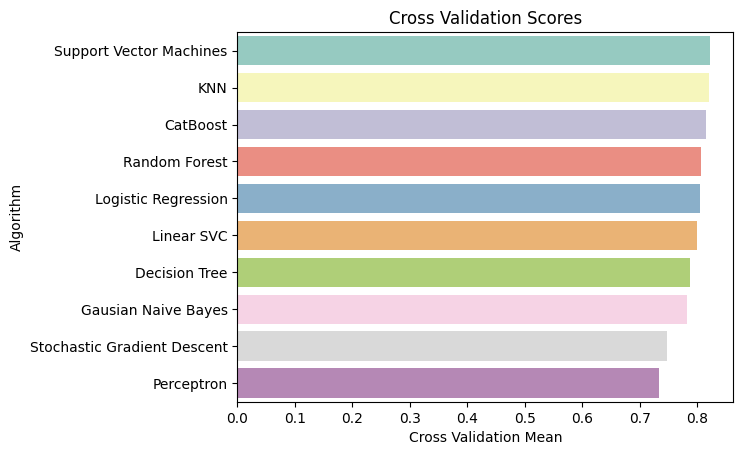

In [116]:
sns.barplot(x='Cross Validation Mean', y='Algorithm', data=cv_res, order=cv_res.sort_values(by='Cross Validation Mean', ascending=False)['Algorithm'], palette='Set3')
plt.xlabel('Cross Validation Mean')
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')


## 6.3.3 Hyperparameter tuning for SVM

Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [117]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.757 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.831 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.835 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.756 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.824 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [118]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [119]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [120]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [121]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
len(Y_pred)

418

 Preparing data for submission

In [123]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [124]:
ss.shape

(418, 2)

In [125]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [126]:
submit.shape

(418, 2)

In [127]:
# Create and save csv file 

submit.to_csv("svm_titanic.csv", index = False)